## PROBLEM STATEMENT:

### The Centres for Medicare & Medicaid Services (CMS), a federal agency based in the US, is responsible for administering the country’s major healthcare programs, including Medicare and Medicaid. CMS collects, analyses the data and produces research reports. It then works to eliminate the instances of fraud and abuse within the healthcare system. The agency aims to provide a healthcare system with better care, access to coverage and improved health services to the citizens. CMS also aims to reduce the overall health costs such as hospital expenses and insurance premiums for the citizens.

### The CMS rates hospitals in the US on a scale of 1-5, with the objective of making it easier for patients and consumers to compare the quality of services offered by various hospitals.The ratings directly influence the consumers’ choice of hospitals and may significantly impact hospitals' revenues. Thus, it is extremely important for hospitals to identify the key factors that affect their ratings so that they can work on improving them.

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import IncrementalPCA
from sklearn.preprocessing import PowerTransformer

### Reading the Dataset

In [2]:
df_comp = pd.read_csv('Complications - Hospital.csv')

In [3]:
df_comp.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,No Different than the National Rate,331,3.8,2.6,5.5,NaN,04/01/2012,03/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Serious blood clots after surgery,PSI_12_POSTOP_PULMEMB_DVT,No Different than the National Rate,4549,3.32,1.25,5.38,NaN,07/01/2013,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Blood stream infection after surgery,PSI_13_POST_SEPSIS,No Different than the National Rate,578,5.72,0.00,11.48,NaN,07/01/2013,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,A wound that splits open after surgery on the...,PSI_14_POSTOP_DEHIS,No Different than the National Rate,445,2.72,0.65,4.79,NaN,07/01/2013,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Accidental cuts and tears from medical treatment,PSI_15_ACC_LAC,No Different than the National Rate,16429,1.35,0.76,1.95,NaN,07/01/2013,06/30/2015


In [4]:
# Info of the dataset.
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52998 entries, 0 to 52997
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           52998 non-null  int64 
 1   Hospital Name         52998 non-null  object
 2   Address               52998 non-null  object
 3   City                  52998 non-null  object
 4   State                 52998 non-null  object
 5   ZIP Code              52998 non-null  int64 
 6   County Name           52833 non-null  object
 7   Phone Number          52998 non-null  int64 
 8   Measure Name          52998 non-null  object
 9   Measure ID            52998 non-null  object
 10  Compared to National  52998 non-null  object
 11  Denominator           52998 non-null  object
 12  Score                 52998 non-null  object
 13  Lower Estimate        52998 non-null  object
 14  Higher Estimate       52998 non-null  object
 15  Footnote              21874 non-null

In [5]:
df_hcahps = pd.read_csv('HCAHPS - Hospital.csv',header=0,encoding= 'unicode_escape')

In [6]:
df_hcahps.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_STAR_RATING,Summary star rating,...,NaN,Not Applicable,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,...,NaN,66,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,...,NaN,12,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,...,NaN,22,NaN,Not Applicable,1194,NaN,27,NaN,01/01/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,...,NaN,Not Applicable,NaN,84,1194,NaN,27,NaN,01/01/2015,12/31/2015


In [7]:
# Info of the dataset.
df_hcahps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   Provider ID                            264990 non-null  int64 
 1   Hospital Name                          264990 non-null  object
 2   Address                                264990 non-null  object
 3   City                                   264990 non-null  object
 4   State                                  264990 non-null  object
 5   ZIP Code                               264990 non-null  int64 
 6   County Name                            264165 non-null  object
 7   Phone Number                           264990 non-null  int64 
 8   HCAHPS Measure ID                      264990 non-null  object
 9   HCAHPS Question                        264990 non-null  object
 10  HCAHPS Answer Description              264990 non-null  object
 11  

In [8]:
df_HAI = pd.read_csv('Healthcare Associated Infections - Hospital.csv')

In [9]:
df_HAI.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Lower Confidence Limit,HAI_1_CI_LOWER,NaN,1.03,NaN,1/1/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Upper Confidence Limit,HAI_1_CI_UPPER,NaN,2.765,NaN,1/1/2015,12/31/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Number of Device Days,HAI_1_DOPC_DAYS,NaN,7117,NaN,1/1/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Predicted Cases,HAI_1_ELIGCASES,NaN,9.198,NaN,1/1/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,CLABSI: Observed Cases,HAI_1_NUMERATOR,NaN,16,NaN,1/1/2015,12/31/2015


In [10]:
# Info of the dataset.
df_HAI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           231264 non-null  int64 
 1   Hospital Name         231264 non-null  object
 2   Address               231264 non-null  object
 3   City                  231264 non-null  object
 4   State                 231264 non-null  object
 5   ZIP Code              231264 non-null  int64 
 6   County Name           230544 non-null  object
 7   Phone Number          231264 non-null  int64 
 8   Measure Name          231264 non-null  object
 9   Measure ID            231264 non-null  object
 10  Compared to National  38544 non-null   object
 11  Score                 231264 non-null  object
 12  Footnote              103373 non-null  object
 13  Measure Start Date    231264 non-null  object
 14  Measure End Date      231264 non-null  object
dtypes: int64(3), obje

In [11]:
df_HGI = pd.read_csv('Hospital General Information.csv',header=0,encoding= 'unicode_escape')

In [12]:
df_HGI.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Same as the National average,NaN
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,Above the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Below the National average,NaN
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Acute Care Hospitals,Government - Hospital District or Authority,...,Same as the National average,NaN,Below the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Same as the National average,NaN
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the National average,NaN,Same as the National average,NaN,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Acute Care Hospitals,Proprietary,...,Same as the National average,NaN,Not Available,Results are not available for this reporting p...,Same as the National average,NaN,Above the National average,NaN,Not Available,Results are not available for this reporting p...


In [13]:
# Info of the dataset.
df_HGI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4818 non-null   int64 
 1   Hospital Name                                                  4818 non-null   object
 2   Address                                                        4818 non-null   object
 3   City                                                           4818 non-null   object
 4   State                                                          4818 non-null   object
 5   ZIP Code                                                       4818 non-null   int64 
 6   County Name                                                    4803 non-null   object
 7   Phone Number                                                   4818 n

In [14]:
df_OIE = pd.read_csv('Outpatient Imaging Efficiency - Hospital.csv')

In [15]:
df_OIE.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure ID,Measure Name,Score,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_10,Abdomen CT Use of Contrast Material,6.4,NaN,07/01/2014,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_11,Thorax CT Use of Contrast Material,0.9,NaN,07/01/2014,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_13,Outpatients who got cardiac imaging stress tes...,7.1,NaN,07/01/2014,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_14,Outpatients with brain CT scans who got a sinu...,2.4,NaN,07/01/2014,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,OP_8,MRI Lumbar Spine for Low Back Pain,38.1,NaN,07/01/2014,06/30/2015


In [16]:
# Info of the dataset.
df_OIE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28908 entries, 0 to 28907
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Provider ID         28908 non-null  int64 
 1   Hospital Name       28908 non-null  object
 2   Address             28908 non-null  object
 3   City                28908 non-null  object
 4   State               28908 non-null  object
 5   ZIP Code            28908 non-null  int64 
 6   County Name         28818 non-null  object
 7   Phone Number        28908 non-null  int64 
 8   Measure ID          28908 non-null  object
 9   Measure Name        28908 non-null  object
 10  Score               28908 non-null  object
 11  Footnote            12595 non-null  object
 12  Measure Start Date  28908 non-null  object
 13  Measure End Date    28908 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.1+ MB


In [17]:
df_RAD = pd.read_csv('Readmissions and Deaths - Hospital.csv')

In [18]:
df_RAD.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Acute Myocardial Infarction (AMI) 30-Day Morta...,MORT_30_AMI,No Different than the National Rate,733,12.5,10.6,14.9,NaN,07/01/2012,06/30/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for CABG,MORT_30_CABG,No Different than the National Rate,278,4.2,2.6,6.8,NaN,07/01/2012,06/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Death rate for chronic obstructive pulmonary d...,MORT_30_COPD,No Different than the National Rate,586,9.3,7.3,11.8,NaN,07/01/2012,06/30/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart failure (HF) 30-Day Mortality Rate,MORT_30_HF,No Different than the National Rate,797,12.4,10.4,14.6,NaN,07/01/2012,06/30/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Pneumonia (PN) 30-Day Mortality Rate,MORT_30_PN,No Different than the National Rate,599,15.5,13.0,18.5,NaN,07/01/2012,06/30/2015


In [19]:
# Info of the dataset.
df_RAD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67452 entries, 0 to 67451
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           67452 non-null  int64 
 1   Hospital Name         67452 non-null  object
 2   Address               67452 non-null  object
 3   City                  67452 non-null  object
 4   State                 67452 non-null  object
 5   ZIP Code              67452 non-null  int64 
 6   County Name           67242 non-null  object
 7   Phone Number          67452 non-null  int64 
 8   Measure Name          67452 non-null  object
 9   Measure ID            67452 non-null  object
 10  Compared to National  67452 non-null  object
 11  Denominator           67452 non-null  object
 12  Score                 67452 non-null  object
 13  Lower Estimate        67452 non-null  object
 14  Higher Estimate       67452 non-null  object
 15  Footnote              25742 non-null

In [20]:
df_TAEC = pd.read_csv('Timely and Effective Care - Hospital.csv')

In [21]:
df_TAEC.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Condition,Measure ID,Measure Name,Score,Sample,Footnote,Measure Start Date,Measure End Date
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_7a,Fibrinolytic Therapy Received Within 30 Minute...,Not Available,Not Available,7 - No cases met the criteria for this measure.,01/01/2015,12/31/2015
1,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Heart Attack or Chest Pain,AMI_8a,Primary PCI Received Within 90 Minutes of Hosp...,92,24,3 - Results are based on a shorter time period...,01/01/2015,09/30/2015
2,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Children's Asthma,CAC_3,Home Management Plan of Care Document,Not Available,Not Available,5 - Results are not available for this reporti...,01/01/2015,12/31/2015
3,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Emergency Department,ED_1b,ED1,269,535,2 - Data submitted were based on a sample of c...,01/01/2015,12/31/2015
4,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Emergency Department,ED_2b,ED2,68,535,2 - Data submitted were based on a sample of c...,01/01/2015,12/31/2015


In [22]:
# Info of the dataset.
df_TAEC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Provider ID         207174 non-null  int64 
 1   Hospital Name       207174 non-null  object
 2   Address             207174 non-null  object
 3   City                207174 non-null  object
 4   State               207174 non-null  object
 5   ZIP Code            207174 non-null  int64 
 6   County Name         206529 non-null  object
 7   Phone Number        207174 non-null  int64 
 8   Condition           207174 non-null  object
 9   Measure ID          207174 non-null  object
 10  Measure Name        207174 non-null  object
 11  Score               207174 non-null  object
 12  Sample              202356 non-null  object
 13  Footnote            160185 non-null  object
 14  Measure Start Date  207174 non-null  object
 15  Measure End Date    207174 non-null  object
dtypes:

In [23]:
measure = ['MORT_30_AMI', 'MORT_30_CABG','MORT_30_COPD','MORT_30_HF','MORT_30_PN','MORT_30_STK','PSI_4_SURG_COMP','HAI_1','HAI_2','HAI_3','HAI_4','HAI_5','HAI_6','COMP_HIP_KNEE','PSI_90_SAFETY','READM_30_AMI','READM_30_CABG','READM_30_COPD','READM_30_HF','READM_30_HIP_KNEE','READM_30_PN','READM_30_STK','READM_30_HOSP_WIDE','H_CLEAN_HSP','H_COMP_1','H_COMP_2','H_COMP_3','H_COMP_4','H_COMP_5','H_COMP_6','H_HSP_RATING','H_QUIET_HSP','H_RECMND','H_COMP_7','CAC_3','IMM_2','IMM_3','OP_4','OP_22','OP_23','PC_01','STK_1','STK_4','STK_6','STK_8','VTE_1','VTE_2','VTE_3','VTE_5','VTE_6','ED_1b','ED_2b','OP_3','OP_5','OP_18b','OP_20','OP_21','OP_8','OP_10','OP_11','OP_13','OP_14']

### Complications - Hospital

In [24]:
df_comp = df_comp[['Provider ID','Measure ID','Score']]

In [25]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52998 entries, 0 to 52997
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Provider ID  52998 non-null  int64 
 1   Measure ID   52998 non-null  object
 2   Score        52998 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [26]:
df_comp = df_comp[pd.notnull(df_comp['Measure ID'])]

In [27]:
df_comp.shape

(52998, 3)

In [28]:
df_comp.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,COMP_HIP_KNEE,4818
1,PSI_12_POSTOP_PULMEMB_DVT,4818
2,PSI_13_POST_SEPSIS,4818
3,PSI_14_POSTOP_DEHIS,4818
4,PSI_15_ACC_LAC,4818
5,PSI_3_ULCER,4818
6,PSI_4_SURG_COMP,4818
7,PSI_6_IAT_PTX,4818
8,PSI_7_CVCBI,4818
9,PSI_8_POST_HIP,4818


In [29]:
df_comp = df_comp.loc[df_comp['Measure ID'].isin(measure)]

In [30]:
df_comp.shape

(14454, 3)

In [31]:
df_comp.drop_duplicates(keep='first',inplace=True)   # Dropping Duplicates
df_comp.shape

(14454, 3)

In [32]:
# Pivot:

df_1 = df_comp.pivot(index='Provider ID' , columns='Measure ID' , values = 'Score')
df_1.head()

Measure ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY
Provider ID,,,
10001,3.8,168.26,0.68
10005,3.0,179.05,0.85
10006,3.8,198.33,0.91
10007,Not Available,Not Available,0.79
10008,Not Available,Not Available,0.90


### HCAHPS - Hospital

In [33]:
df_hcahps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264990 entries, 0 to 264989
Data columns (total 22 columns):
 #   Column                                 Non-Null Count   Dtype 
---  ------                                 --------------   ----- 
 0   Provider ID                            264990 non-null  int64 
 1   Hospital Name                          264990 non-null  object
 2   Address                                264990 non-null  object
 3   City                                   264990 non-null  object
 4   State                                  264990 non-null  object
 5   ZIP Code                               264990 non-null  int64 
 6   County Name                            264165 non-null  object
 7   Phone Number                           264990 non-null  int64 
 8   HCAHPS Measure ID                      264990 non-null  object
 9   HCAHPS Question                        264990 non-null  object
 10  HCAHPS Answer Description              264990 non-null  object
 11  

In [34]:
df_hcahps = df_hcahps[['Provider ID', 'HCAHPS Measure ID', 'HCAHPS Linear Mean Value']]

In [35]:
df_hcahps = df_hcahps[pd.notnull(df_hcahps['HCAHPS Measure ID'])]

In [36]:
df_hcahps.groupby(['HCAHPS Measure ID']).size().reset_index(name='counts')

,HCAHPS Measure ID,counts
0,H_CLEAN_HSP_A_P,4818
1,H_CLEAN_HSP_SN_P,4818
2,H_CLEAN_HSP_U_P,4818
3,H_CLEAN_LINEAR_SCORE,4818
4,H_CLEAN_STAR_RATING,4818
5,H_COMP_1_A_P,4818
6,H_COMP_1_LINEAR_SCORE,4818
7,H_COMP_1_SN_P,4818
8,H_COMP_1_STAR_RATING,4818
9,H_COMP_1_U_P,4818


### Replacing the Measure ID

In [37]:
df_hcahps = df_hcahps.replace(['H_CLEAN_HSP_A_P','H_CLEAN_HSP_SN_P','H_CLEAN_HSP_U_P','H_CLEAN_LINEAR_SCORE','H_CLEAN_STAR_RATING'],'H_CLEAN_HSP')

In [38]:
df_hcahps = df_hcahps.replace(['H_COMP_1_A_P','H_COMP_1_LINEAR_SCORE','H_COMP_1_SN_P','H_COMP_1_STAR_RATING','H_COMP_1_U_P'],'H_COMP_1')

In [39]:
df_hcahps = df_hcahps.replace(['H_COMP_2_A_P','H_COMP_2_LINEAR_SCORE','H_COMP_2_SN_P','H_COMP_2_STAR_RATING','H_COMP_2_U_P'],'H_COMP_2')

In [40]:
df_hcahps = df_hcahps.replace(['H_COMP_3_A_P','H_COMP_3_LINEAR_SCORE','H_COMP_3_SN_P','H_COMP_3_STAR_RATING','H_COMP_3_U_P'],'H_COMP_3')

In [41]:
df_hcahps = df_hcahps.replace(['H_COMP_4_A_P','H_COMP_4_LINEAR_SCORE','H_COMP_4_SN_P','H_COMP_4_STAR_RATING','H_COMP_4_U_P'],'H_COMP_4')

In [42]:
df_hcahps = df_hcahps.replace(['H_COMP_5_A_P','H_COMP_5_LINEAR_SCORE','H_COMP_5_SN_P','H_COMP_5_STAR_RATING','H_COMP_5_U_P'],'H_COMP_5')

In [43]:
df_hcahps = df_hcahps.replace(['H_COMP_6_A_P','H_COMP_6_LINEAR_SCORE','H_COMP_6_SN_P','H_COMP_6_STAR_RATING','H_COMP_6_U_P'],'H_COMP_6')

In [44]:
df_hcahps = df_hcahps.replace(['H_COMP_7_A_P','H_COMP_7_LINEAR_SCORE','H_COMP_7_SN_P','H_COMP_7_STAR_RATING','H_COMP_7_U_P'],'H_COMP_7')

In [45]:
df_hcahps = df_hcahps.replace(['H_HSP_RATING_0_6','H_HSP_RATING_7_8','H_HSP_RATING_9_10','H_HSP_RATING_LINEAR_SCORE','H_HSP_RATING_STAR_RATING'],'H_HSP_RATING')

In [46]:
df_hcahps = df_hcahps.replace(['H_QUIET_HSP_A_P','H_QUIET_HSP_SN_P','H_QUIET_HSP_U_P','H_QUIET_LINEAR_SCORE','H_QUIET_STAR_RATING'],'H_QUIET_HSP')

In [47]:
df_hcahps = df_hcahps.replace(['H_RECMND_DN','H_RECMND_DY','H_RECMND_LINEAR_SCORE','H_RECMND_PY','H_RECMND_STAR_RATING'],'H_RECMND')

In [48]:
df_hcahps

,Provider ID,HCAHPS Measure ID,HCAHPS Linear Mean Value
0,10001,H_STAR_RATING,Not Applicable
1,10001,H_CLEAN_HSP,Not Applicable
2,10001,H_CLEAN_HSP,Not Applicable
3,10001,H_CLEAN_HSP,Not Applicable
4,10001,H_CLEAN_HSP,84
...,...,...,...
264985,670112,H_RECMND,Not Applicable
264986,670112,H_RECMND,Not Applicable
264987,670112,H_RECMND,Not Available
264988,670112,H_RECMND,Not Applicable


In [49]:
df_hcahps = df_hcahps.loc[df_hcahps['HCAHPS Measure ID'].isin(measure)]

In [50]:
df_hcahps = df_hcahps.drop_duplicates(subset=['Provider ID','HCAHPS Measure ID'], keep='first')  # Dropping Duplicates

In [51]:
df_hcahps.shape

(52998, 3)

In [52]:
df_hcahps = df_hcahps.rename(columns = {"HCAHPS Measure ID": "Measure ID"})

In [53]:
df_hcahps.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,H_CLEAN_HSP,4818
1,H_COMP_1,4818
2,H_COMP_2,4818
3,H_COMP_3,4818
4,H_COMP_4,4818
5,H_COMP_5,4818
6,H_COMP_6,4818
7,H_COMP_7,4818
8,H_HSP_RATING,4818
9,H_QUIET_HSP,4818


In [54]:
# Pivot:
df_2 = df_hcahps.pivot(index ='Provider ID', columns='Measure ID', values='HCAHPS Linear Mean Value')

In [55]:
df_2

Measure ID,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_COMP_6,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND
Provider ID,,,,,,,,,,,
10001,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,87,82,Not Applicable,Not Applicable,Not Applicable
10005,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,88,81,Not Applicable,Not Applicable,Not Applicable
10006,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,83,80,Not Applicable,Not Applicable,Not Applicable
10007,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,86,82,Not Applicable,Not Applicable,Not Applicable
10008,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Available,Not Applicable,Not Applicable,Not Applicable
...,...,...,...,...,...,...,...,...,...,...,...
670107,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Available,Not Applicable,Not Applicable,Not Applicable
670108,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Available,Not Applicable,Not Applicable,Not Applicable
670109,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Available,Not Applicable,Not Applicable,Not Applicable


### HAF (Healthcare Affected Infection - Hospital)

In [56]:
df_HAI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231264 entries, 0 to 231263
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Provider ID           231264 non-null  int64 
 1   Hospital Name         231264 non-null  object
 2   Address               231264 non-null  object
 3   City                  231264 non-null  object
 4   State                 231264 non-null  object
 5   ZIP Code              231264 non-null  int64 
 6   County Name           230544 non-null  object
 7   Phone Number          231264 non-null  int64 
 8   Measure Name          231264 non-null  object
 9   Measure ID            231264 non-null  object
 10  Compared to National  38544 non-null   object
 11  Score                 231264 non-null  object
 12  Footnote              103373 non-null  object
 13  Measure Start Date    231264 non-null  object
 14  Measure End Date      231264 non-null  object
dtypes: int64(3), obje

In [57]:
df_HAI = df_HAI[['Provider ID','Measure ID','Score']]
df_HAI.shape

(231264, 3)

In [58]:
df_HAI.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,HAI_1_CI_LOWER,4818
1,HAI_1_CI_UPPER,4818
2,HAI_1_DOPC_DAYS,4818
3,HAI_1_ELIGCASES,4818
4,HAI_1_NUMERATOR,4818
5,HAI_1_SIR,4818
6,HAI_1a_CI_LOWER,4818
7,HAI_1a_CI_UPPER,4818
8,HAI_1a_DOPC_DAYS,4818
9,HAI_1a_ELIGCASES,4818


In [59]:
df_HAI = df_HAI.replace(['HAI_1_CI_LOWER','HAI_1_CI_UPPER','HAI_1_DOPC_DAYS','HAI_1_ELIGCASES','HAI_1_NUMERATOR','HAI_1_SIR','HAI_1a_CI_LOWER','HAI_1a_CI_UPPER','HAI_1a_DOPC_DAYS','HAI_1a_ELIGCASES','HAI_1a_NUMERATOR','HAI_1a_SIR'],'HAI_1')

In [60]:
df_HAI = df_HAI.replace(['HAI_2_CI_LOWER','HAI_2_CI_UPPER','HAI_2_DOPC_DAYS','HAI_2_ELIGCASES','HAI_2_NUMERATOR','HAI_2_SIR','HAI_2a_CI_LOWER','HAI_2a_CI_UPPER','HAI_2a_DOPC_DAYS','HAI_2a_ELIGCASES','HAI_2a_NUMERATOR','HAI_2a_SIR'],'HAI_2')

In [61]:
df_HAI = df_HAI.replace(['HAI_3_CI_LOWER','HAI_3_CI_UPPER','HAI_3_DOPC_DAYS','HAI_3_ELIGCASES','HAI_3_NUMERATOR','HAI_3_SIR'],'HAI_3')

In [62]:
df_HAI = df_HAI.replace(['HAI_4_CI_LOWER','HAI_4_CI_UPPER','HAI_4_DOPC_DAYS','HAI_4_ELIGCASES','HAI_4_NUMERATOR','HAI_4_SIR'],'HAI_4')

In [63]:
df_HAI = df_HAI.replace(['HAI_5_CI_LOWER','HAI_5_CI_UPPER','HAI_5_DOPC_DAYS','HAI_5_ELIGCASES','HAI_5_NUMERATOR','HAI_5_SIR'],'HAI_5')

In [64]:
df_HAI = df_HAI.replace(['HAI_6_CI_LOWER','HAI_6_CI_UPPER','HAI_6_DOPC_DAYS','HAI_6_ELIGCASES','HAI_6_NUMERATOR','HAI_6_SIR'],'HAI_6')

In [65]:
df_HAI = df_HAI[pd.notnull(df_HAI['Measure ID'])]


In [66]:
df_HAI = df_HAI.drop_duplicates(subset=['Provider ID','Measure ID'],keep='first') # Dropping Duplicates

In [67]:
df_HAI = df_HAI.loc[df_HAI['Measure ID'].isin(measure)]

In [68]:
df_HAI.shape

(28908, 3)

In [69]:
# Pivot:
df_3 = df_HAI.pivot(index='Provider ID',columns='Measure ID',values='Score')
df_3.head()

Measure ID,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
Provider ID,,,,,,
10001,1.03,0.974,0.95,Not Available,0.107,0.562
10005,0.337,0.167,0.019,Not Available,0.233,0.177
10006,0.138,0.373,0.016,Not Available,0.401,0.309
10007,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
10008,Not Available,Not Available,Not Available,Not Available,Not Available,0.029


### OIE (Outpatient Imaging Efficiency)

In [70]:
df_OIE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28908 entries, 0 to 28907
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Provider ID         28908 non-null  int64 
 1   Hospital Name       28908 non-null  object
 2   Address             28908 non-null  object
 3   City                28908 non-null  object
 4   State               28908 non-null  object
 5   ZIP Code            28908 non-null  int64 
 6   County Name         28818 non-null  object
 7   Phone Number        28908 non-null  int64 
 8   Measure ID          28908 non-null  object
 9   Measure Name        28908 non-null  object
 10  Score               28908 non-null  object
 11  Footnote            12595 non-null  object
 12  Measure Start Date  28908 non-null  object
 13  Measure End Date    28908 non-null  object
dtypes: int64(3), object(11)
memory usage: 3.1+ MB


In [71]:
df_OIE = df_OIE[['Provider ID','Measure ID','Score']]
df_OIE.shape

(28908, 3)

In [72]:
df_OIE.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,OP_10,4818
1,OP_11,4818
2,OP_13,4818
3,OP_14,4818
4,OP_8,4818
5,OP_9,4818


In [73]:
df_OIE = df_OIE.loc[df_OIE['Measure ID'].isin(measure)]

In [74]:
df_OIE = df_OIE[pd.notnull(df_OIE['Measure ID'])]
df_OIE.drop_duplicates(keep='first',inplace=True)    # Dropping Duplicates.

In [75]:
df_OIE.shape

(24090, 3)

In [76]:
# Pivot:
df_4 = df_OIE.pivot(index='Provider ID',columns='Measure ID',values='Score')

In [77]:
df_4

Measure ID,OP_10,OP_11,OP_13,OP_14,OP_8
Provider ID,,,,,
10001,6.4,0.9,7.1,2.4,38.1
10005,13.3,10.2,5.3,4.0,42.8
10006,11.8,4.6,0.0,4.6,45.6
10007,24.3,6.1,Not Available,Not Available,Not Available
10008,3.6,Not Available,Not Available,0.6,Not Available
...,...,...,...,...,...
670107,Not Available,Not Available,Not Available,Not Available,Not Available
670108,Not Available,Not Available,Not Available,Not Available,Not Available
670109,Not Available,Not Available,Not Available,Not Available,Not Available


### Readmissions and Deaths - Hospital

In [78]:
df_RAD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67452 entries, 0 to 67451
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Provider ID           67452 non-null  int64 
 1   Hospital Name         67452 non-null  object
 2   Address               67452 non-null  object
 3   City                  67452 non-null  object
 4   State                 67452 non-null  object
 5   ZIP Code              67452 non-null  int64 
 6   County Name           67242 non-null  object
 7   Phone Number          67452 non-null  int64 
 8   Measure Name          67452 non-null  object
 9   Measure ID            67452 non-null  object
 10  Compared to National  67452 non-null  object
 11  Denominator           67452 non-null  object
 12  Score                 67452 non-null  object
 13  Lower Estimate        67452 non-null  object
 14  Higher Estimate       67452 non-null  object
 15  Footnote              25742 non-null

In [79]:
df_RAD = df_RAD[['Provider ID','Measure ID','Score']]
df_RAD.shape

(67452, 3)

In [80]:
df_RAD.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,MORT_30_AMI,4818
1,MORT_30_CABG,4818
2,MORT_30_COPD,4818
3,MORT_30_HF,4818
4,MORT_30_PN,4818
5,MORT_30_STK,4818
6,READM_30_AMI,4818
7,READM_30_CABG,4818
8,READM_30_COPD,4818
9,READM_30_HF,4818


In [81]:
df_RAD = df_RAD.loc[df_RAD['Measure ID'].isin(measure)]

In [82]:
df_RAD = df_RAD[pd.notnull(df_RAD['Measure ID'])]
df_RAD.drop_duplicates(keep='first',inplace=True)     # Dropping Duplicates.
df_RAD.shape

(67452, 3)

In [83]:
# Pivot:
df_5 = df_RAD.pivot(index='Provider ID', columns='Measure ID', values='Score')
df_5.head()

Measure ID,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,READM_30_AMI,READM_30_CABG,READM_30_COPD,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,READM_30_PN,READM_30_STK
Provider ID,,,,,,,,,,,,,,
10001,12.5,4.2,9.3,12.4,15.5,15.4,16.5,15.1,21.1,21.4,5.1,15.4,18.7,12.7
10005,16.0,Not Available,7.6,15.5,20.8,15.5,16.7,Not Available,18.0,21.9,5.7,14.9,16.4,13.4
10006,16.7,4.1,7.1,15.6,18.2,17.9,16.1,15.2,19.8,20.6,5.0,15.4,17.9,12.0
10007,Not Available,Not Available,9.3,14.4,18.8,16.6,Not Available,Not Available,19.9,21.1,Not Available,16.6,17.3,12.7
10008,Not Available,Not Available,8.2,12.7,15.7,Not Available,Not Available,Not Available,19.2,23.1,Not Available,15.7,16.0,Not Available


### TAEC (Timely and Effective Care - Hospital)

In [84]:
df_TAEC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207174 entries, 0 to 207173
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Provider ID         207174 non-null  int64 
 1   Hospital Name       207174 non-null  object
 2   Address             207174 non-null  object
 3   City                207174 non-null  object
 4   State               207174 non-null  object
 5   ZIP Code            207174 non-null  int64 
 6   County Name         206529 non-null  object
 7   Phone Number        207174 non-null  int64 
 8   Condition           207174 non-null  object
 9   Measure ID          207174 non-null  object
 10  Measure Name        207174 non-null  object
 11  Score               207174 non-null  object
 12  Sample              202356 non-null  object
 13  Footnote            160185 non-null  object
 14  Measure Start Date  207174 non-null  object
 15  Measure End Date    207174 non-null  object
dtypes:

In [85]:
df_TAEC = df_TAEC[['Provider ID','Measure ID','Score']]

In [86]:
df_TAEC.groupby(['Measure ID']).size().reset_index(name='counts')

,Measure ID,counts
0,AMI_7a,4818
1,AMI_8a,4818
2,CAC_3,4818
3,EDV,4818
4,ED_1b,4818
5,ED_2b,4818
6,HF_2,4818
7,IMM_2,4818
8,IMM_3_OP_27_FAC_ADHPCT,4818
9,OP_1,4818


In [87]:
df_TAEC = df_TAEC.replace(['IMM_3_OP_27_FAC_ADHPCT'],'IMM_3')

In [88]:
df_TAEC = df_TAEC.replace(['OP_3b'],'OP_3')

In [89]:
df_TAEC = df_TAEC[pd.notnull(df_TAEC['Measure ID'])]
df_TAEC.drop_duplicates(keep='first',inplace=True)        # Dropping Duplicates
df_TAEC.shape

(207174, 3)

In [90]:
df_TAEC = df_TAEC.loc[df_TAEC['Measure ID'].isin(measure)]

In [91]:
# Pivot:
df_6 = df_TAEC.pivot(index='Provider ID',columns='Measure ID', values='Score')
df_6.head()

Measure ID,CAC_3,ED_1b,ED_2b,IMM_2,IMM_3,OP_18b,OP_20,OP_21,OP_22,OP_23,...,PC_01,STK_1,STK_4,STK_6,STK_8,VTE_1,VTE_2,VTE_3,VTE_5,VTE_6
Provider ID,,,,,,,,,,,,,,,,,,,,,
10001,Not Available,269,68,97,81,196,65,99,4,Not Available,...,0,99,67,99,87,97,99,91,90,0
10005,Not Available,243,71,99,83,117,27,60,2,86,...,1,98,Not Available,88,100,95,94,100,100,Not Available
10006,Not Available,217,78,100,87,133,10,58,1,Not Available,...,0,99,Not Available,97,90,98,89,86,92,0
10007,Not Available,219,68,99,53,119,38,90,1,Not Available,...,Not Available,80,Not Available,71,Not Available,97,99,Not Available,Not Available,Not Available
10008,Not Available,180,56,95,43,98,27,49,1,Not Available,...,Not Available,Not Available,Not Available,Not Available,Not Available,99,Not Available,Not Available,Not Available,Not Available


### Merging all the dataframes:

In [92]:
df = pd.merge(df_1,df_4, on='Provider ID', how= 'outer').merge(df_5, on ='Provider ID', how = 'outer').merge(df_6,on='Provider ID',how='outer').merge(df_2,on='Provider ID', how='outer').merge(df_3,on='Provider ID',how='outer')

In [93]:
df.shape

(4818, 62)

In [94]:
df.head()

Measure ID,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,OP_10,OP_11,OP_13,OP_14,OP_8,MORT_30_AMI,MORT_30_CABG,...,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
Provider ID,,,,,,,,,,,,,,,,,,,,,
10001,3.8,168.26,0.68,6.4,0.9,7.1,2.4,38.1,12.5,4.2,...,82,Not Applicable,Not Applicable,Not Applicable,1.03,0.974,0.95,Not Available,0.107,0.562
10005,3.0,179.05,0.85,13.3,10.2,5.3,4.0,42.8,16.0,Not Available,...,81,Not Applicable,Not Applicable,Not Applicable,0.337,0.167,0.019,Not Available,0.233,0.177
10006,3.8,198.33,0.91,11.8,4.6,0.0,4.6,45.6,16.7,4.1,...,80,Not Applicable,Not Applicable,Not Applicable,0.138,0.373,0.016,Not Available,0.401,0.309
10007,Not Available,Not Available,0.79,24.3,6.1,Not Available,Not Available,Not Available,Not Available,Not Available,...,82,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
10008,Not Available,Not Available,0.90,3.6,Not Available,Not Available,0.6,Not Available,Not Available,Not Available,...,Not Available,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Available,Not Available,Not Available,Not Available,0.029


In [95]:
df_HGI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   Provider ID                                                    4818 non-null   int64 
 1   Hospital Name                                                  4818 non-null   object
 2   Address                                                        4818 non-null   object
 3   City                                                           4818 non-null   object
 4   State                                                          4818 non-null   object
 5   ZIP Code                                                       4818 non-null   int64 
 6   County Name                                                    4803 non-null   object
 7   Phone Number                                                   4818 n

In [96]:
df_HGI = df_HGI[['Provider ID','Hospital overall rating']]

In [97]:
df_HGI = df_HGI[pd.notnull(df_HGI['Hospital overall rating'])]
df_HGI.drop_duplicates(keep='first',inplace=True)   # Dropping Duplicates.

In [98]:
df_HGI.head()

,Provider ID,Hospital overall rating
0,10001,3
1,10005,3
2,10006,2
3,10007,3
4,10008,3


In [99]:
df_final =  pd.merge(df_HGI,df, on='Provider ID', how = 'left')

In [100]:
df_final.shape

(4818, 64)

In [101]:
df_final = df_final.replace(['Not Available','Not Applicable' ],0)

In [102]:
df_final = df_final[df_final['Hospital overall rating'] != 0]
df_final.shape

(3648, 64)

In [103]:
df_final.head()  # Final merged Dataset for further Analysis:

,Provider ID,Hospital overall rating,COMP_HIP_KNEE,PSI_4_SURG_COMP,PSI_90_SAFETY,OP_10,OP_11,OP_13,OP_14,OP_8,...,H_COMP_7,H_HSP_RATING,H_QUIET_HSP,H_RECMND,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
0,10001,3,3.8,168.26,0.68,6.4,0.9,7.1,2.4,38.1,...,82,0,0,0,1.03,0.974,0.95,0,0.107,0.562
1,10005,3,3.0,179.05,0.85,13.3,10.2,5.3,4.0,42.8,...,81,0,0,0,0.337,0.167,0.019,0,0.233,0.177
2,10006,2,3.8,198.33,0.91,11.8,4.6,0.0,4.6,45.6,...,80,0,0,0,0.138,0.373,0.016,0,0.401,0.309
3,10007,3,0,0,0.79,24.3,6.1,0,0,0,...,82,0,0,0,0,0,0,0,0,0
4,10008,3,0,0,0.90,3.6,0,0,0.6,0,...,0,0,0,0,0,0,0,0,0,0.029


In [104]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Provider ID              3648 non-null   int64 
 1   Hospital overall rating  3648 non-null   object
 2   COMP_HIP_KNEE            3648 non-null   object
 3   PSI_4_SURG_COMP          3648 non-null   object
 4   PSI_90_SAFETY            3648 non-null   object
 5   OP_10                    3648 non-null   object
 6   OP_11                    3648 non-null   object
 7   OP_13                    3648 non-null   object
 8   OP_14                    3648 non-null   object
 9   OP_8                     3648 non-null   object
 10  MORT_30_AMI              3648 non-null   object
 11  MORT_30_CABG             3648 non-null   object
 12  MORT_30_COPD             3648 non-null   object
 13  MORT_30_HF               3648 non-null   object
 14  MORT_30_PN               3648 non-null  

### Convert Obj to int

In [105]:
df_final_int = df_final.select_dtypes(include='int64')

In [106]:
df_final_obj = df_final.select_dtypes(exclude='int64')

In [107]:
df_final_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Provider ID   3648 non-null   int64
 1   H_CLEAN_HSP   3648 non-null   int64
 2   H_COMP_1      3648 non-null   int64
 3   H_COMP_2      3648 non-null   int64
 4   H_COMP_3      3648 non-null   int64
 5   H_COMP_4      3648 non-null   int64
 6   H_COMP_5      3648 non-null   int64
 7   H_HSP_RATING  3648 non-null   int64
 8   H_QUIET_HSP   3648 non-null   int64
 9   H_RECMND      3648 non-null   int64
dtypes: int64(10)
memory usage: 313.5 KB


In [108]:
df_final_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Hospital overall rating  3648 non-null   object
 1   COMP_HIP_KNEE            3648 non-null   object
 2   PSI_4_SURG_COMP          3648 non-null   object
 3   PSI_90_SAFETY            3648 non-null   object
 4   OP_10                    3648 non-null   object
 5   OP_11                    3648 non-null   object
 6   OP_13                    3648 non-null   object
 7   OP_14                    3648 non-null   object
 8   OP_8                     3648 non-null   object
 9   MORT_30_AMI              3648 non-null   object
 10  MORT_30_CABG             3648 non-null   object
 11  MORT_30_COPD             3648 non-null   object
 12  MORT_30_HF               3648 non-null   object
 13  MORT_30_PN               3648 non-null   object
 14  MORT_30_STK              3648 non-null  

In [109]:
column_list_1 = df_final_obj.columns
column_list_1

Index(['Hospital overall rating', 'COMP_HIP_KNEE', 'PSI_4_SURG_COMP',
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_COMP_6', 'H_COMP_7',
       'HAI_1', 'HAI_2', 'HAI_3', 'HAI_4', 'HAI_5', 'HAI_6'],
      dtype='object')

In [110]:
def coerce_df_columns_to_numeric (df_final_obj, column_list_1):
    df_final_obj[column_list_1]=df_final_obj[column_list_1].astype('float')

In [111]:
coerce_df_columns_to_numeric (df_final_obj, column_list_1)

In [112]:
df_final_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hospital overall rating  3648 non-null   float64
 1   COMP_HIP_KNEE            3648 non-null   float64
 2   PSI_4_SURG_COMP          3648 non-null   float64
 3   PSI_90_SAFETY            3648 non-null   float64
 4   OP_10                    3648 non-null   float64
 5   OP_11                    3648 non-null   float64
 6   OP_13                    3648 non-null   float64
 7   OP_14                    3648 non-null   float64
 8   OP_8                     3648 non-null   float64
 9   MORT_30_AMI              3648 non-null   float64
 10  MORT_30_CABG             3648 non-null   float64
 11  MORT_30_COPD             3648 non-null   float64
 12  MORT_30_HF               3648 non-null   float64
 13  MORT_30_PN               3648 non-null   float64
 14  MORT_30_STK             

In [113]:
df_final_obj['Hospital overall rating'] = df_final_obj['Hospital overall rating'].astype('int32')

In [114]:
df_final_obj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Hospital overall rating  3648 non-null   int32  
 1   COMP_HIP_KNEE            3648 non-null   float64
 2   PSI_4_SURG_COMP          3648 non-null   float64
 3   PSI_90_SAFETY            3648 non-null   float64
 4   OP_10                    3648 non-null   float64
 5   OP_11                    3648 non-null   float64
 6   OP_13                    3648 non-null   float64
 7   OP_14                    3648 non-null   float64
 8   OP_8                     3648 non-null   float64
 9   MORT_30_AMI              3648 non-null   float64
 10  MORT_30_CABG             3648 non-null   float64
 11  MORT_30_COPD             3648 non-null   float64
 12  MORT_30_HF               3648 non-null   float64
 13  MORT_30_PN               3648 non-null   float64
 14  MORT_30_STK             

In [115]:
df_final = pd.concat((df_final_int,df_final_obj), axis=1)  # merging


In [116]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3648 entries, 0 to 4815
Data columns (total 64 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Provider ID              3648 non-null   int64  
 1   H_CLEAN_HSP              3648 non-null   int64  
 2   H_COMP_1                 3648 non-null   int64  
 3   H_COMP_2                 3648 non-null   int64  
 4   H_COMP_3                 3648 non-null   int64  
 5   H_COMP_4                 3648 non-null   int64  
 6   H_COMP_5                 3648 non-null   int64  
 7   H_HSP_RATING             3648 non-null   int64  
 8   H_QUIET_HSP              3648 non-null   int64  
 9   H_RECMND                 3648 non-null   int64  
 10  Hospital overall rating  3648 non-null   int32  
 11  COMP_HIP_KNEE            3648 non-null   float64
 12  PSI_4_SURG_COMP          3648 non-null   float64
 13  PSI_90_SAFETY            3648 non-null   float64
 14  OP_10                   

In [117]:
df_final_1 = df_final

## EDA Analysis:

### - Bar Plot

Text(0, 0.5, 'Count')

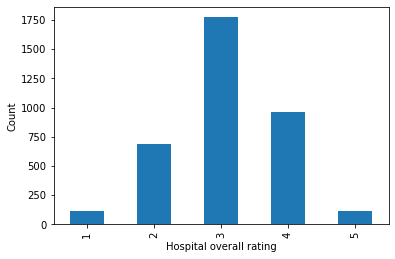

In [118]:
df_final.groupby('Hospital overall rating').size().plot(kind='bar')
plt.ylabel('Count')

In [119]:
cor = df_final.corr().abs()

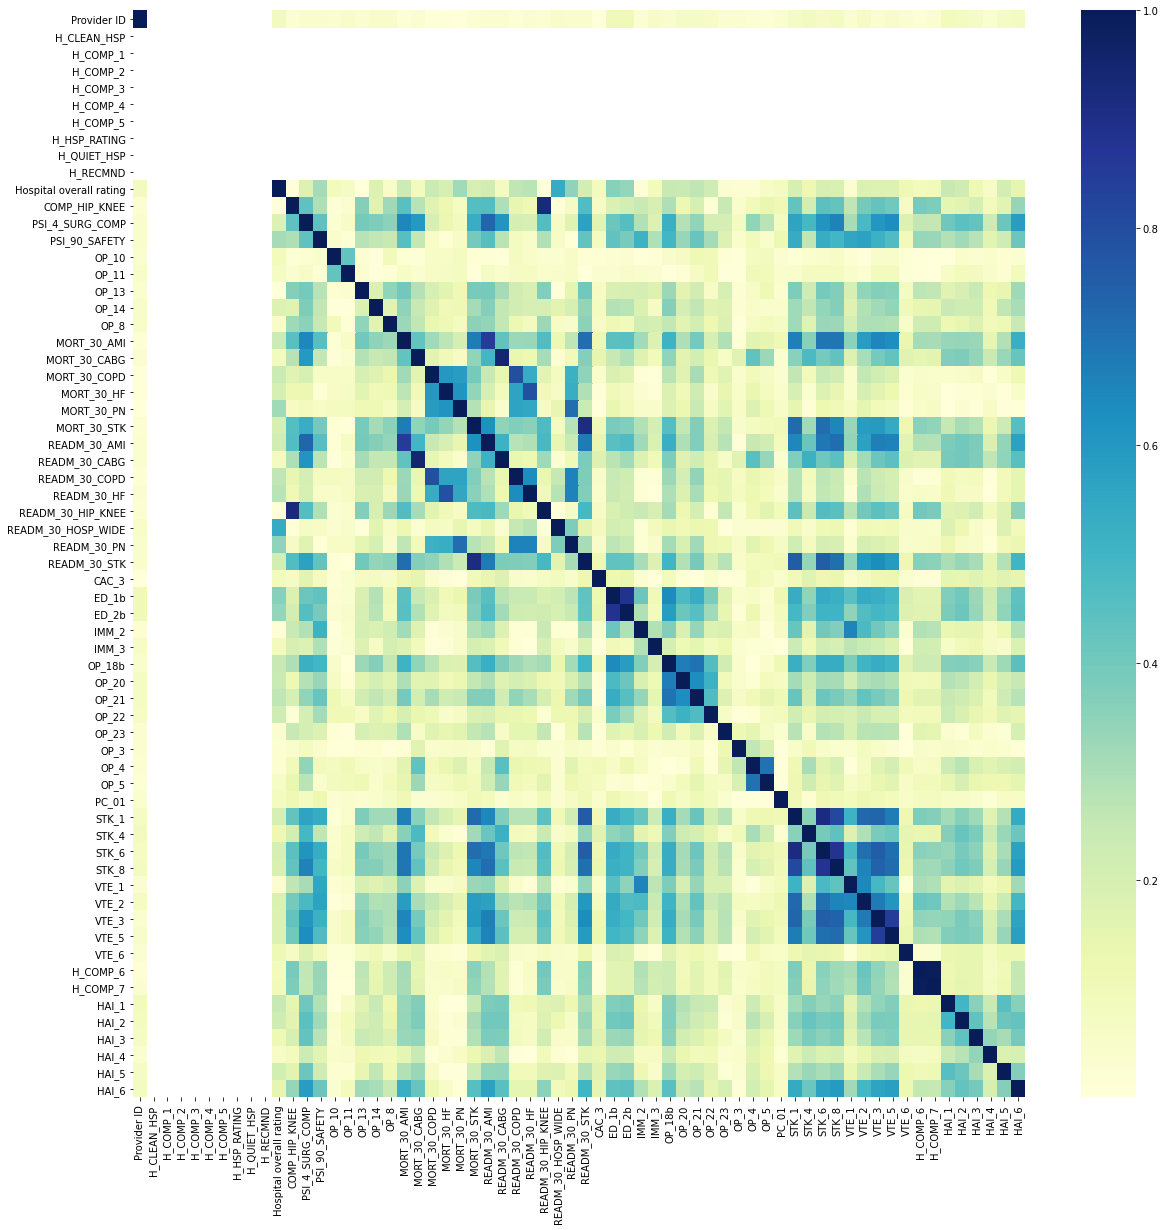

In [120]:
plt.figure(figsize=(20,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

In [121]:
df_des = df_final.drop(['Provider ID','Hospital overall rating'], axis=1)
df_des.describe()

,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_HSP_RATING,H_QUIET_HSP,H_RECMND,COMP_HIP_KNEE,...,VTE_5,VTE_6,H_COMP_6,H_COMP_7,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
count,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.000000,...,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000,3648.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.203755,...,55.725329,0.685307,80.342105,75.363213,0.139307,0.156398,0.189988,0.053274,0.166538,0.418575
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.442945,...,46.307927,2.969396,23.104162,21.604642,0.239604,0.238404,0.347217,0.186803,0.355601,0.391996
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,84.000000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.700000,...,85.000000,0.000000,87.000000,81.000000,0.009000,0.031000,0.000000,0.000000,0.000000,0.372000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.200000,...,100.000000,0.000000,89.000000,83.000000,0.209000,0.237000,0.258250,0.000000,0.185000,0.697250
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.000000,...,100.000000,94.000000,99.000000,99.000000,2.460000,2.937000,2.650000,1.953000,4.430000,2.399000


In [122]:
df_out = df_final.drop(['Provider ID'], axis = 1)

- Plotting using Sub-plots:

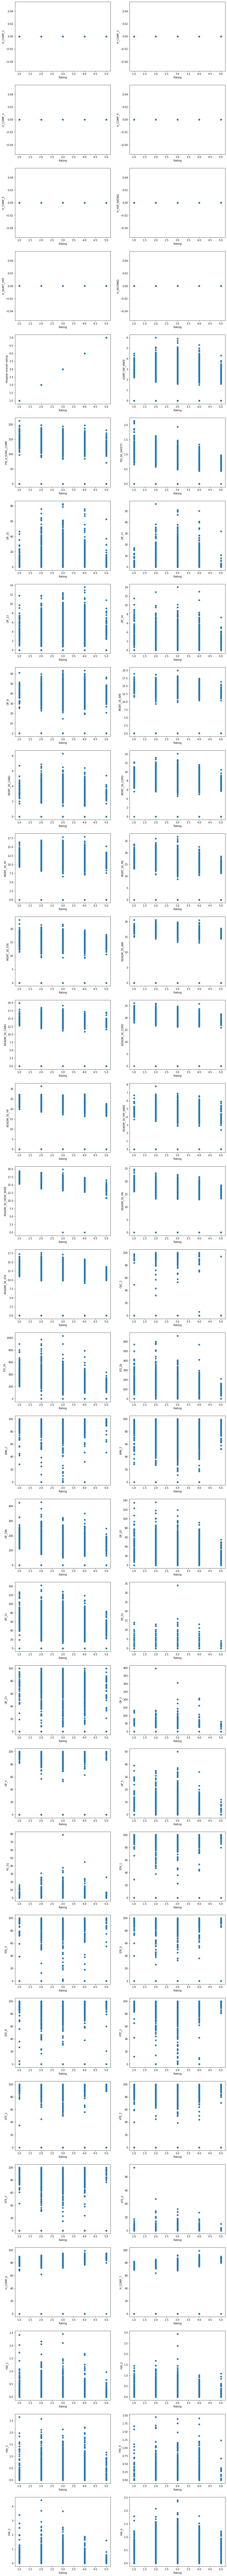

In [123]:
a=33
b=2
c=1
fig= plt.figure(figsize=(15,200))

for col in range(1, df_out.shape[1]):
    plt.subplot(a,b,c)
    plt.scatter(df_out['Hospital overall rating'], df_out.iloc[:,col])
    plt.xlabel("Rating")
    plt.ylabel(df_out.columns[col])
    c = c+1
plt.show()

In [124]:
df_final.to_pickle('edadata.pkl')

In [125]:
df_final = pd.read_pickle('edadata.pkl')

In [126]:
df_final

,Provider ID,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_HSP_RATING,H_QUIET_HSP,H_RECMND,...,VTE_5,VTE_6,H_COMP_6,H_COMP_7,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
0,10001,0,0,0,0,0,0,0,0,0,...,90.0,0.0,87.0,82.0,1.030,0.974,0.950,0.0,0.107,0.562
1,10005,0,0,0,0,0,0,0,0,0,...,100.0,0.0,88.0,81.0,0.337,0.167,0.019,0.0,0.233,0.177
2,10006,0,0,0,0,0,0,0,0,0,...,92.0,0.0,83.0,80.0,0.138,0.373,0.016,0.0,0.401,0.309
3,10007,0,0,0,0,0,0,0,0,0,...,0.0,0.0,86.0,82.0,0.000,0.000,0.000,0.0,0.000,0.000
4,10008,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,670096,0,0,0,0,0,0,0,0,0,...,0.0,0.0,83.0,80.0,0.000,0.000,0.000,0.0,0.000,0.012
4801,670098,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000,0.022,0.000,0.0,0.000,1.187
4812,480001,0,0,0,0,0,0,0,0,0,...,87.0,0.0,76.0,76.0,0.350,0.894,0.000,0.0,0.322,0.182
4813,480002,0,0,0,0,0,0,0,0,0,...,43.0,0.0,81.0,76.0,0.568,0.649,0.323,0.0,0.000,0.040


## Linear Regression:

### Splitting data into Train and Test set:

In [127]:
## Feature Variable:

X = df_final.drop(['Hospital overall rating'], axis=1)
X.head()

,Provider ID,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_HSP_RATING,H_QUIET_HSP,H_RECMND,...,VTE_5,VTE_6,H_COMP_6,H_COMP_7,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
0,10001,0,0,0,0,0,0,0,0,0,...,90.0,0.0,87.0,82.0,1.030,0.974,0.950,0.0,0.107,0.562
1,10005,0,0,0,0,0,0,0,0,0,...,100.0,0.0,88.0,81.0,0.337,0.167,0.019,0.0,0.233,0.177
2,10006,0,0,0,0,0,0,0,0,0,...,92.0,0.0,83.0,80.0,0.138,0.373,0.016,0.0,0.401,0.309
3,10007,0,0,0,0,0,0,0,0,0,...,0.0,0.0,86.0,82.0,0.000,0.000,0.000,0.0,0.000,0.000
4,10008,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.029


In [128]:
## Putting Response Variable

y = df_final['Hospital overall rating']
y.head()

0    3
1    3
2    2
3    3
4    3
Name: Hospital overall rating, dtype: int32

In [129]:
## Splitting Data

X_train,X_test,y_train,y_test = train_test_split(X ,y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Feature Scaling

In [130]:
df_final.columns

Index(['Provider ID', 'H_CLEAN_HSP', 'H_COMP_1', 'H_COMP_2', 'H_COMP_3',
       'H_COMP_4', 'H_COMP_5', 'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND',
       'Hospital overall rating', 'COMP_HIP_KNEE', 'PSI_4_SURG_COMP',
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_COMP_6', 'H_COMP_7',
       'HAI_1', 'HAI_2', 'HAI_3', 'HAI_4', 'HAI_5', 'HAI_6'],
      dtype='object')

In [131]:
scaler = StandardScaler()

X_train[['H_CLEAN_HSP', 'H_COMP_1', 'H_COMP_2', 'H_COMP_3',
       'H_COMP_4', 'H_COMP_5', 'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND',
       'COMP_HIP_KNEE', 'PSI_4_SURG_COMP',
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_COMP_6', 'H_COMP_7',
       'HAI_1', 'HAI_2', 'HAI_3', 'HAI_4', 'HAI_5', 'HAI_6']] = scaler.fit_transform(X_train[['H_CLEAN_HSP', 'H_COMP_1', 'H_COMP_2', 'H_COMP_3',
       'H_COMP_4', 'H_COMP_5', 'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND',
       'COMP_HIP_KNEE', 'PSI_4_SURG_COMP',
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_COMP_6', 'H_COMP_7',
       'HAI_1', 'HAI_2', 'HAI_3', 'HAI_4', 'HAI_5', 'HAI_6']])
X_train.head()

,Provider ID,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_HSP_RATING,H_QUIET_HSP,H_RECMND,...,VTE_5,VTE_6,H_COMP_6,H_COMP_7,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
4110,450586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.207020,-0.256069,-3.442013,-3.452069,-0.588893,-0.653507,-0.555375,-0.287619,-0.469805,-1.069947
4025,450162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.207020,-0.256069,0.417364,0.399644,-0.588893,-0.204022,-0.555375,-0.287619,-0.469805,-1.069947
4464,500015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.954966,-0.256069,0.288718,0.078668,-0.296446,0.054644,-0.555375,-0.287619,-0.469805,1.469687
3983,450042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.890106,1.970071,0.374482,0.307937,0.301350,0.436282,0.405751,-0.287619,0.253327,-0.295230
119,30038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.803627,1.228025,0.245836,0.216229,-0.120118,1.420059,-0.515447,-0.287619,0.337412,1.066937


## Model Building

## RFE (Recursive Feature Elimination)

In [132]:
## Fitting 

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,25)
rfe = rfe.fit(X_train,y_train)

In [133]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Provider ID', False, 30),
 ('H_CLEAN_HSP', False, 31),
 ('H_COMP_1', False, 34),
 ('H_COMP_2', False, 33),
 ('H_COMP_3', False, 36),
 ('H_COMP_4', False, 35),
 ('H_COMP_5', False, 32),
 ('H_HSP_RATING', False, 37),
 ('H_QUIET_HSP', False, 38),
 ('H_RECMND', False, 39),
 ('COMP_HIP_KNEE', True, 1),
 ('PSI_4_SURG_COMP', False, 2),
 ('PSI_90_SAFETY', True, 1),
 ('OP_10', True, 1),
 ('OP_11', False, 19),
 ('OP_13', True, 1),
 ('OP_14', False, 12),
 ('OP_8', True, 1),
 ('MORT_30_AMI', True, 1),
 ('MORT_30_CABG', True, 1),
 ('MORT_30_COPD', True, 1),
 ('MORT_30_HF', True, 1),
 ('MORT_30_PN', True, 1),
 ('MORT_30_STK', True, 1),
 ('READM_30_AMI', False, 14),
 ('READM_30_CABG', True, 1),
 ('READM_30_COPD', True, 1),
 ('READM_30_HF', True, 1),
 ('READM_30_HIP_KNEE', True, 1),
 ('READM_30_HOSP_WIDE', True, 1),
 ('READM_30_PN', False, 9),
 ('READM_30_STK', True, 1),
 ('CAC_3', False, 21),
 ('ED_1b', True, 1),
 ('ED_2b', False, 7),
 ('IMM_2', True, 1),
 ('IMM_3', True, 1),
 ('OP_18b', False, 3)

In [134]:
col = X_train.columns[rfe.support_]
col

Index(['COMP_HIP_KNEE', 'PSI_90_SAFETY', 'OP_10', 'OP_13', 'OP_8',
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_CABG', 'READM_30_COPD',
       'READM_30_HF', 'READM_30_HIP_KNEE', 'READM_30_HOSP_WIDE',
       'READM_30_STK', 'ED_1b', 'IMM_2', 'IMM_3', 'STK_1', 'VTE_1', 'H_COMP_6',
       'H_COMP_7', 'HAI_1'],
      dtype='object')

In [135]:
X_train.columns[~rfe.support_]

Index(['Provider ID', 'H_CLEAN_HSP', 'H_COMP_1', 'H_COMP_2', 'H_COMP_3',
       'H_COMP_4', 'H_COMP_5', 'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND',
       'PSI_4_SURG_COMP', 'OP_11', 'OP_14', 'READM_30_AMI', 'READM_30_PN',
       'CAC_3', 'ED_2b', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23', 'OP_3',
       'OP_4', 'OP_5', 'PC_01', 'STK_4', 'STK_6', 'STK_8', 'VTE_2', 'VTE_3',
       'VTE_5', 'VTE_6', 'HAI_2', 'HAI_3', 'HAI_4', 'HAI_5', 'HAI_6'],
      dtype='object')

### Using Stats Model

In [136]:
X_train_rfe = X_train[col]

In [137]:

X_train_rfe = sm.add_constant(X_train_rfe)

In [138]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [139]:
lm.params

const                 3.090873
COMP_HIP_KNEE        -0.049374
PSI_90_SAFETY        -0.361973
OP_10                -0.056065
OP_13                 0.050604
OP_8                  0.058252
MORT_30_AMI          -0.055197
MORT_30_CABG         -0.071749
MORT_30_COPD         -0.114222
MORT_30_HF           -0.068625
MORT_30_PN           -0.165254
MORT_30_STK          -0.080006
READM_30_CABG         0.110197
READM_30_COPD         0.130099
READM_30_HF           0.063098
READM_30_HIP_KNEE     0.079644
READM_30_HOSP_WIDE   -0.362338
READM_30_STK          0.055405
ED_1b                -0.181173
IMM_2                 0.120877
IMM_3                 0.070229
STK_1                 0.049640
VTE_1                 0.091308
H_COMP_6             -0.514522
H_COMP_7              0.619351
HAI_1                -0.075709
dtype: float64

In [140]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.554
Model:                                 OLS   Adj. R-squared:                  0.550
Method:                      Least Squares   F-statistic:                     125.7
Date:                     Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                             15:19:03   Log-Likelihood:                -2102.1
No. Observations:                     2553   AIC:                             4256.
Df Residuals:                         2527   BIC:                             4408.
Df Model:                               25                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    281.856      0.000       3.069       3.112
COMP_HIP_KNEE         -0.0494      0.030     -1.666      0.096      -0.107       0.009
PSI_90_SAFETY         -0.3620      0.015    -23.568      0.000      -0.392      -0.332
OP_10                 -0.0561      0.011     -5.009      0.000      -0.078      -0.034
OP_13                  0.0506      0.013      3.907      0.000       0.025       0.076
OP_8                   0.0583      0.013      4.611      0.000       0.033       0.083
MORT_30_AMI           -0.0552      0.018     -3.122      0.002      -0.090      -0.021
MORT_30_CABG          -0.0717      0.037     -1.965      0.050      -0.143      -0.000
MORT_30_COPD          -0.1142      0.021     -5.537      0.000      -0.155      -0.074
MORT_30_HF            -0.0686      0.021     -3.235      0.001      -0.110      -0.027
MORT_30_PN            -0.1653      0.015    -10.906      0.000      -0.195      -0.136
MORT_30_STK           -0.0800      0.029     -2.784      0.005      -0.136      -0.024
READM_30_CABG          0.1102      0.037      2.982      0.003       0.038       0.183
READM_30_COPD          0.1301      0.021      6.147      0.000       0.089       0.172
READM_30_HF            0.0631      0.021      2.940      0.003       0.021       0.105
READM_30_HIP_KNEE      0.0796      0.030      2.653      0.008       0.021       0.139
READM_30_HOSP_WIDE    -0.3623      0.012    -29.103      0.000      -0.387      -0.338
READM_30_STK           0.0554      0.031      1.790      0.074      -0.005       0.116
ED_1b                 -0.1812      0.015    -12.056      0.000      -0.211      -0.152
IMM_2                  0.1209      0.016      7.704      0.000       0.090       0.152
IMM_3                  0.0702      0.012      5.927      0.000       0.047       0.093
STK_1                  0.0496      0.020      2.487      0.013       0.011       0.089
VTE_1                  0.0913      0.017      5.530      0.000       0.059       0.124
H_COMP_6              -0.5145      0.105     -4.898      0.000      -0.721      -0.309
H_COMP_7               0.6194      0.104      5.946      0.000       0.415       0.824
HAI_1                 -0.0757      0.013     -5.837      0.000      -0.101      -0.050
==============================================================================
Omnibus:                      890.131   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15507.335
Skew:                          -1.187   Prob(JB):                         0.00
Kurtosis:                      14.838   Cond. No.                         36.8
==============================================================================

Notes:
[1] Standard Errors ass

### Calculating VIF:

In [141]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,H_COMP_6,91.77
24,H_COMP_7,90.22
12,READM_30_CABG,11.35
7,MORT_30_CABG,11.09
17,READM_30_STK,7.97
15,READM_30_HIP_KNEE,7.49
1,COMP_HIP_KNEE,7.30
11,MORT_30_STK,6.87
14,READM_30_HF,3.83
9,MORT_30_HF,3.74


From above we can see that the VIF value is quite large for H_COMP_6, hence we can drop this feature.

In [142]:
X_train_new = X_train_rfe.drop(["H_COMP_6"], axis=1)

In [143]:
## Adding Constant

X_train_new_1 = sm.add_constant(X_train_new)

In [144]:
lm_1 = sm.OLS(y_train, X_train_new_1).fit()

In [145]:
lm_1.params

const                 3.090873
COMP_HIP_KNEE        -0.054843
PSI_90_SAFETY        -0.358575
OP_10                -0.054194
OP_13                 0.048532
OP_8                  0.059129
MORT_30_AMI          -0.056370
MORT_30_CABG         -0.066583
MORT_30_COPD         -0.115396
MORT_30_HF           -0.068852
MORT_30_PN           -0.169088
MORT_30_STK          -0.084374
READM_30_CABG         0.110042
READM_30_COPD         0.128807
READM_30_HF           0.065625
READM_30_HIP_KNEE     0.077335
READM_30_HOSP_WIDE   -0.359031
READM_30_STK          0.056987
ED_1b                -0.177881
IMM_2                 0.118146
IMM_3                 0.067715
STK_1                 0.047754
VTE_1                 0.084917
H_COMP_7              0.113041
HAI_1                -0.072081
dtype: float64

In [146]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.550
Model:                                 OLS   Adj. R-squared:                  0.546
Method:                      Least Squares   F-statistic:                     128.8
Date:                     Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                             15:19:04   Log-Likelihood:                -2114.2
No. Observations:                     2553   AIC:                             4278.
Df Residuals:                         2528   BIC:                             4424.
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    280.583      0.000       3.069       3.112
COMP_HIP_KNEE         -0.0548      0.030     -1.843      0.065      -0.113       0.003
PSI_90_SAFETY         -0.3586      0.015    -23.266      0.000      -0.389      -0.328
OP_10                 -0.0542      0.011     -4.823      0.000      -0.076      -0.032
OP_13                  0.0485      0.013      3.732      0.000       0.023       0.074
OP_8                   0.0591      0.013      4.659      0.000       0.034       0.084
MORT_30_AMI           -0.0564      0.018     -3.174      0.002      -0.091      -0.022
MORT_30_CABG          -0.0666      0.037     -1.816      0.070      -0.138       0.005
MORT_30_COPD          -0.1154      0.021     -5.569      0.000      -0.156      -0.075
MORT_30_HF            -0.0689      0.021     -3.231      0.001      -0.111      -0.027
MORT_30_PN            -0.1691      0.015    -11.123      0.000      -0.199      -0.139
MORT_30_STK           -0.0844      0.029     -2.924      0.003      -0.141      -0.028
READM_30_CABG          0.1100      0.037      2.965      0.003       0.037       0.183
READM_30_COPD          0.1288      0.021      6.059      0.000       0.087       0.170
READM_30_HF            0.0656      0.022      3.045      0.002       0.023       0.108
READM_30_HIP_KNEE      0.0773      0.030      2.565      0.010       0.018       0.136
READM_30_HOSP_WIDE    -0.3590      0.012    -28.749      0.000      -0.384      -0.335
READM_30_STK           0.0570      0.031      1.833      0.067      -0.004       0.118
ED_1b                 -0.1779      0.015    -11.796      0.000      -0.207      -0.148
IMM_2                  0.1181      0.016      7.501      0.000       0.087       0.149
IMM_3                  0.0677      0.012      5.694      0.000       0.044       0.091
STK_1                  0.0478      0.020      2.382      0.017       0.008       0.087
VTE_1                  0.0849      0.017      5.136      0.000       0.052       0.117
H_COMP_7               0.1130      0.013      8.818      0.000       0.088       0.138
HAI_1                 -0.0721      0.013     -5.541      0.000      -0.098      -0.047
==============================================================================
Omnibus:                      893.186   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15800.541
Skew:                          -1.188   Prob(JB):                         0.00
Kurtosis:                      14.954   Cond. No.                         12.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,READM_30_CABG,11.35
7,MORT_30_CABG,11.08
17,READM_30_STK,7.97
15,READM_30_HIP_KNEE,7.49
1,COMP_HIP_KNEE,7.29
11,MORT_30_STK,6.86
14,READM_30_HF,3.83
9,MORT_30_HF,3.74
13,READM_30_COPD,3.72
8,MORT_30_COPD,3.54


From above we can see that MORT_30_CABG has VIF value of 11.08 and p-value of 0.07 hence we can drop this feature.

In [148]:
X_train_new_2 = X_train_new_1.drop(["MORT_30_CABG"],axis=1)

In [149]:
# Adding Constant
X_train_new_2 = sm.add_constant(X_train_new_2)

In [150]:
lm_3 = sm.OLS(y_train,X_train_new_2).fit()

In [151]:
lm_3.params

const                 3.090873
COMP_HIP_KNEE        -0.052338
PSI_90_SAFETY        -0.357913
OP_10                -0.054649
OP_13                 0.049769
OP_8                  0.058503
MORT_30_AMI          -0.058598
MORT_30_COPD         -0.117637
MORT_30_HF           -0.069938
MORT_30_PN           -0.170528
MORT_30_STK          -0.085465
READM_30_CABG         0.047088
READM_30_COPD         0.131160
READM_30_HF           0.066678
READM_30_HIP_KNEE     0.075409
READM_30_HOSP_WIDE   -0.358823
READM_30_STK          0.059114
ED_1b                -0.176113
IMM_2                 0.117469
IMM_3                 0.067634
STK_1                 0.047290
VTE_1                 0.084401
H_COMP_7              0.112890
HAI_1                -0.073165
dtype: float64

In [152]:
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.550
Model:                                 OLS   Adj. R-squared:                  0.545
Method:                      Least Squares   F-statistic:                     134.1
Date:                     Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                             15:19:04   Log-Likelihood:                -2115.8
No. Observations:                     2553   AIC:                             4280.
Df Residuals:                         2529   BIC:                             4420.
Df Model:                               23                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    280.456      0.000       3.069       3.112
COMP_HIP_KNEE         -0.0523      0.030     -1.760      0.078      -0.111       0.006
PSI_90_SAFETY         -0.3579      0.015    -23.219      0.000      -0.388      -0.328
OP_10                 -0.0546      0.011     -4.863      0.000      -0.077      -0.033
OP_13                  0.0498      0.013      3.831      0.000       0.024       0.075
OP_8                   0.0585      0.013      4.610      0.000       0.034       0.083
MORT_30_AMI           -0.0586      0.018     -3.306      0.001      -0.093      -0.024
MORT_30_COPD          -0.1176      0.021     -5.685      0.000      -0.158      -0.077
MORT_30_HF            -0.0699      0.021     -3.282      0.001      -0.112      -0.028
MORT_30_PN            -0.1705      0.015    -11.228      0.000      -0.200      -0.141
MORT_30_STK           -0.0855      0.029     -2.961      0.003      -0.142      -0.029
READM_30_CABG          0.0471      0.013      3.549      0.000       0.021       0.073
READM_30_COPD          0.1312      0.021      6.179      0.000       0.090       0.173
READM_30_HF            0.0667      0.022      3.094      0.002       0.024       0.109
READM_30_HIP_KNEE      0.0754      0.030      2.502      0.012       0.016       0.135
READM_30_HOSP_WIDE    -0.3588      0.012    -28.721      0.000      -0.383      -0.334
READM_30_STK           0.0591      0.031      1.902      0.057      -0.002       0.120
ED_1b                 -0.1761      0.015    -11.698      0.000      -0.206      -0.147
IMM_2                  0.1175      0.016      7.457      0.000       0.087       0.148
IMM_3                  0.0676      0.012      5.685      0.000       0.044       0.091
STK_1                  0.0473      0.020      2.358      0.018       0.008       0.087
VTE_1                  0.0844      0.017      5.103      0.000       0.052       0.117
H_COMP_7               0.1129      0.013      8.802      0.000       0.088       0.138
HAI_1                 -0.0732      0.013     -5.628      0.000      -0.099      -0.048
==============================================================================
Omnibus:                      891.714   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15694.735
Skew:                          -1.187   Prob(JB):                         0.00
Kurtosis:                      14.913   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [153]:
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,READM_30_STK,7.95
14,READM_30_HIP_KNEE,7.48
1,COMP_HIP_KNEE,7.28
10,MORT_30_STK,6.86
13,READM_30_HF,3.82
8,MORT_30_HF,3.74
12,READM_30_COPD,3.71
7,MORT_30_COPD,3.53
20,STK_1,3.31
6,MORT_30_AMI,2.59


Again, now we can notice that READM_30_STK has a VIF of 8.10 and has an p-value of 0.057, hence we drop this feature.

In [154]:
X_train_new_3 = X_train_new_2.drop(['READM_30_STK'],axis=1)

In [155]:
## Adding a constant

X_train_new_3 = sm.add_constant(X_train_new_3)

In [156]:
lm_4 = sm.OLS(y_train , X_train_new_3).fit()

In [157]:
lm_4.params

const                 3.090873
COMP_HIP_KNEE        -0.054819
PSI_90_SAFETY        -0.357023
OP_10                -0.054002
OP_13                 0.050888
OP_8                  0.059812
MORT_30_AMI          -0.053300
MORT_30_COPD         -0.119353
MORT_30_HF           -0.073990
MORT_30_PN           -0.172687
MORT_30_STK          -0.043475
READM_30_CABG         0.047819
READM_30_COPD         0.134055
READM_30_HF           0.071205
READM_30_HIP_KNEE     0.079501
READM_30_HOSP_WIDE   -0.356120
ED_1b                -0.174448
IMM_2                 0.117903
IMM_3                 0.066431
STK_1                 0.055530
VTE_1                 0.081531
H_COMP_7              0.113399
HAI_1                -0.072914
dtype: float64

In [158]:
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.549
Model:                                 OLS   Adj. R-squared:                  0.545
Method:                      Least Squares   F-statistic:                     139.9
Date:                     Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                             15:19:05   Log-Likelihood:                -2117.7
No. Observations:                     2553   AIC:                             4281.
Df Residuals:                         2530   BIC:                             4416.
Df Model:                               22                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    280.311      0.000       3.069       3.112
COMP_HIP_KNEE         -0.0548      0.030     -1.845      0.065      -0.113       0.003
PSI_90_SAFETY         -0.3570      0.015    -23.159      0.000      -0.387      -0.327
OP_10                 -0.0540      0.011     -4.805      0.000      -0.076      -0.032
OP_13                  0.0509      0.013      3.919      0.000       0.025       0.076
OP_8                   0.0598      0.013      4.717      0.000       0.035       0.085
MORT_30_AMI           -0.0533      0.018     -3.043      0.002      -0.088      -0.019
MORT_30_COPD          -0.1194      0.021     -5.770      0.000      -0.160      -0.079
MORT_30_HF            -0.0740      0.021     -3.488      0.000      -0.116      -0.032
MORT_30_PN            -0.1727      0.015    -11.396      0.000      -0.202      -0.143
MORT_30_STK           -0.0435      0.019     -2.337      0.020      -0.080      -0.007
READM_30_CABG          0.0478      0.013      3.604      0.000       0.022       0.074
READM_30_COPD          0.1341      0.021      6.328      0.000       0.093       0.176
READM_30_HF            0.0712      0.021      3.323      0.001       0.029       0.113
READM_30_HIP_KNEE      0.0795      0.030      2.643      0.008       0.021       0.138
READM_30_HOSP_WIDE    -0.3561      0.012    -28.676      0.000      -0.380      -0.332
ED_1b                 -0.1744      0.015    -11.601      0.000      -0.204      -0.145
IMM_2                  0.1179      0.016      7.481      0.000       0.087       0.149
IMM_3                  0.0664      0.012      5.589      0.000       0.043       0.090
STK_1                  0.0555      0.020      2.835      0.005       0.017       0.094
VTE_1                  0.0815      0.016      4.948      0.000       0.049       0.114
H_COMP_7               0.1134      0.013      8.840      0.000       0.088       0.139
HAI_1                 -0.0729      0.013     -5.606      0.000      -0.098      -0.047
==============================================================================
Omnibus:                      871.243   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14685.986
Skew:                          -1.162   Prob(JB):                         0.00
Kurtosis:                      14.518   Cond. No.                         9.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [159]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,READM_30_HIP_KNEE,7.44
1,COMP_HIP_KNEE,7.26
13,READM_30_HF,3.78
8,MORT_30_HF,3.70
12,READM_30_COPD,3.69
7,MORT_30_COPD,3.52
19,STK_1,3.16
10,MORT_30_STK,2.85
6,MORT_30_AMI,2.52
20,VTE_1,2.23


As per the data, COMP_HIP_KNEE has VIF of 7.26 and p-value of 0.065 ,we will drop this feature.

In [160]:
X_train_new_4 = X_train_new_3.drop(['COMP_HIP_KNEE'],axis=1)

In [161]:
## Adding Constant

X_train_new_4 = sm.add_constant(X_train_new_4)

In [162]:
lm_5 = sm.OLS(y_train, X_train_new_4).fit()

In [163]:
lm_5.params

const                 3.090873
PSI_90_SAFETY        -0.357644
OP_10                -0.054019
OP_13                 0.050121
OP_8                  0.058894
MORT_30_AMI          -0.053359
MORT_30_COPD         -0.119120
MORT_30_HF           -0.074737
MORT_30_PN           -0.172764
MORT_30_STK          -0.043535
READM_30_CABG         0.048406
READM_30_COPD         0.132755
READM_30_HF           0.071689
READM_30_HIP_KNEE     0.030086
READM_30_HOSP_WIDE   -0.354792
ED_1b                -0.174265
IMM_2                 0.118215
IMM_3                 0.065893
STK_1                 0.054150
VTE_1                 0.082043
H_COMP_7              0.112600
HAI_1                -0.072443
dtype: float64

In [164]:
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Hospital overall rating   R-squared:                       0.548
Model:                                 OLS   Adj. R-squared:                  0.545
Method:                      Least Squares   F-statistic:                     146.3
Date:                     Mon, 05 Jul 2021   Prob (F-statistic):               0.00
Time:                             15:19:05   Log-Likelihood:                -2119.4
No. Observations:                     2553   AIC:                             4283.
Df Residuals:                         2531   BIC:                             4411.
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.0909      0.011    280.178      0.000       3.069       3.113
PSI_90_SAFETY         -0.3576      0.015    -23.194      0.000      -0.388      -0.327
OP_10                 -0.0540      0.011     -4.804      0.000      -0.076      -0.032
OP_13                  0.0501      0.013      3.860      0.000       0.025       0.076
OP_8                   0.0589      0.013      4.646      0.000       0.034       0.084
MORT_30_AMI           -0.0534      0.018     -3.045      0.002      -0.088      -0.019
MORT_30_COPD          -0.1191      0.021     -5.756      0.000      -0.160      -0.079
MORT_30_HF            -0.0747      0.021     -3.522      0.000      -0.116      -0.033
MORT_30_PN            -0.1728      0.015    -11.396      0.000      -0.202      -0.143
MORT_30_STK           -0.0435      0.019     -2.339      0.019      -0.080      -0.007
READM_30_CABG          0.0484      0.013      3.647      0.000       0.022       0.074
READM_30_COPD          0.1328      0.021      6.267      0.000       0.091       0.174
READM_30_HF            0.0717      0.021      3.344      0.001       0.030       0.114
READM_30_HIP_KNEE      0.0301      0.014      2.198      0.028       0.003       0.057
READM_30_HOSP_WIDE    -0.3548      0.012    -28.604      0.000      -0.379      -0.330
ED_1b                 -0.1743      0.015    -11.583      0.000      -0.204      -0.145
IMM_2                  0.1182      0.016      7.498      0.000       0.087       0.149
IMM_3                  0.0659      0.012      5.542      0.000       0.043       0.089
STK_1                  0.0541      0.020      2.765      0.006       0.016       0.093
VTE_1                  0.0820      0.016      4.977      0.000       0.050       0.114
H_COMP_7               0.1126      0.013      8.778      0.000       0.087       0.138
HAI_1                 -0.0724      0.013     -5.568      0.000      -0.098      -0.047
==============================================================================
Omnibus:                      858.517   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14225.400
Skew:                          -1.143   Prob(JB):                         0.00
Kurtosis:                      14.336   Cond. No.                         6.77
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,READM_30_HF,3.78
7,MORT_30_HF,3.70
11,READM_30_COPD,3.69
6,MORT_30_COPD,3.52
18,STK_1,3.15
9,MORT_30_STK,2.85
5,MORT_30_AMI,2.52
19,VTE_1,2.23
16,IMM_2,2.04
1,PSI_90_SAFETY,1.95


Now from above we can see that VIF value and p-value are under range. Hence, we can go ahead.

### Residual Analysis

In [166]:
y_train_predict = lm_5.predict(X_train_new_4)

In [167]:
y_train

4110    4
4025    4
4464    2
3983    2
119     3
       ..
2572    3
89      3
2436    3
3725    3
2011    3
Name: Hospital overall rating, Length: 2553, dtype: int32

In [168]:
y_train = y_train.to_frame()

In [169]:
y_train_predict = y_train_predict.to_frame()

In [170]:
z = y_train['Hospital overall rating'] - y_train_predict[0]
z

4110    0.995154
4025    0.841011
4464   -0.869454
3983   -0.883075
119     0.004345
          ...   
2572   -0.283460
89     -0.244321
2436   -0.186314
3725    0.481869
2011   -0.082878
Length: 2553, dtype: float64

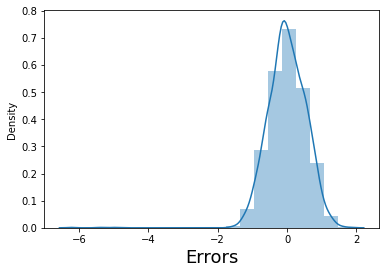

In [171]:
fig = plt.figure()
sns.distplot(z, bins = 20)
plt.xlabel('Errors', fontsize = 18) 
plt.show()

We can observe that it is a normal curve.

## Feature Scaling

In [172]:
X_test[['H_CLEAN_HSP', 'H_COMP_1', 'H_COMP_2', 'H_COMP_3',
       'H_COMP_4', 'H_COMP_5', 'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND',
       'COMP_HIP_KNEE', 'PSI_4_SURG_COMP',
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_COMP_6', 'H_COMP_7',
       'HAI_1', 'HAI_2', 'HAI_3', 'HAI_4', 'HAI_5', 'HAI_6']] = scaler.transform(X_test[['H_CLEAN_HSP', 'H_COMP_1', 'H_COMP_2', 'H_COMP_3',
       'H_COMP_4', 'H_COMP_5', 'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND',
       'COMP_HIP_KNEE', 'PSI_4_SURG_COMP',
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_COMP_6', 'H_COMP_7',
       'HAI_1', 'HAI_2', 'HAI_3', 'HAI_4', 'HAI_5', 'HAI_6']])
X_test.head()

,Provider ID,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_HSP_RATING,H_QUIET_HSP,H_RECMND,...,VTE_5,VTE_6,H_COMP_6,H_COMP_7,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
2611,281320,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.207020,-0.256069,-3.442013,-3.452069,-0.588893,-0.653507,-0.555375,-0.287619,-0.469805,-1.069947
492,50616,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.207020,-0.256069,0.160073,0.216229,-0.588893,-0.623824,0.143367,-0.287619,-0.469805,2.329059
3996,450080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.207020,-0.256069,0.160073,0.262083,-0.588893,-0.653507,-0.555375,-0.287619,-0.469805,1.836523
3174,360044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.207020,-0.256069,0.288718,0.170375,-0.588893,-0.564458,-0.555375,-0.287619,-0.469805,2.064834
3908,440120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.954966,6.793374,0.288718,0.262083,2.563515,2.543771,1.221425,-0.287619,7.697664,0.702667


In [173]:
X_train_new_4.columns


Index(['const', 'PSI_90_SAFETY', 'OP_10', 'OP_13', 'OP_8', 'MORT_30_AMI',
       'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK',
       'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'ED_1b', 'IMM_2', 'IMM_3', 'STK_1', 'VTE_1',
       'H_COMP_7', 'HAI_1'],
      dtype='object')

In [174]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['PSI_90_SAFETY', 'OP_10', 'OP_13', 'OP_8', 'MORT_30_AMI',
       'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN', 'MORT_30_STK',
       'READM_30_CABG', 'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'ED_1b', 'IMM_2', 'IMM_3', 'STK_1', 'VTE_1',
       'H_COMP_7', 'HAI_1']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [175]:
X_test_new

,const,PSI_90_SAFETY,OP_10,OP_13,OP_8,MORT_30_AMI,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,...,READM_30_HF,READM_30_HIP_KNEE,READM_30_HOSP_WIDE,ED_1b,IMM_2,IMM_3,STK_1,VTE_1,H_COMP_7,HAI_1
2611,1.0,-2.027229,0.566784,-1.033674,-0.821473,-1.354907,-3.188758,-3.440359,0.396481,-1.597864,...,-3.762887,0.587714,-0.160792,-2.058590,-3.403063,-3.783540,-1.613401,-2.988767,-3.452069,-0.588893
492,1.0,-0.037401,-0.702434,-1.033674,-0.821473,0.654527,0.472139,0.687658,1.152753,0.791981,...,0.200064,0.492572,-0.063169,0.938509,0.066173,-1.040178,0.665960,0.476538,0.216229,-0.588893
3996,1.0,0.235178,2.051316,0.522557,1.579778,-1.354907,0.301865,0.657305,0.207413,0.747724,...,0.090490,0.540143,-0.648902,0.142532,0.339034,-0.854187,0.182459,-0.083511,0.262083,-0.588893
3174,1.0,0.180662,-0.589111,0.124451,-0.821473,0.654527,0.472139,-0.010462,0.153394,0.747724,...,0.273114,0.635285,0.229697,-0.287946,0.144134,0.680235,0.688984,-0.118514,0.170375,-0.588893
3908,1.0,0.453242,-0.203813,0.667323,0.636076,0.935256,0.982962,1.112601,1.341821,0.408425,...,0.291377,0.207147,-0.453658,0.767943,0.261074,-0.342713,0.550841,0.021498,0.262083,2.563515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4043,1.0,0.207920,-0.883751,-1.033674,-0.821473,-1.354907,0.344434,-0.040816,0.207413,-1.597864,...,-0.092135,-1.600547,0.229697,0.012576,-0.713430,-3.783540,-1.613401,-0.608557,-3.452069,-0.588893
179,1.0,-2.027229,-0.883751,-1.033674,-0.821473,0.595426,0.174159,0.353774,0.234423,-1.597864,...,-0.000823,-1.600547,-0.063169,-2.058590,-3.403063,-3.783540,-1.613401,-2.988767,0.078668,-0.588893
3708,1.0,-2.027229,-0.883751,-1.033674,-0.821473,0.595426,-0.038684,-0.071169,-0.143713,0.467434,...,0.967087,-1.600547,1.303539,1.417720,0.494955,-3.783540,0.458745,-2.988767,-3.452069,-0.588893
1266,1.0,-2.027229,0.532787,-1.033674,-0.821473,-1.354907,0.387002,0.444833,0.909666,0.791981,...,-0.110397,0.445001,-0.941768,-0.174235,0.494955,0.773231,-1.613401,0.441535,0.445498,-0.588893


In [176]:
# Making predictions
y_pred = lm_5.predict(X_test_new)

In [177]:
y_pred = y_pred.to_frame()
y_pred_final = y_pred.apply(lambda x : round(x,0))
y_pred_final[0] = y_pred_final[0].astype(int)
y_pred_final = y_pred_final.rename(columns = {list(y_pred_final)[0] :'predicted_rating'})
y_pred_final

,predicted_rating
2611,3
492,3
3996,3
3174,3
3908,3
...,...
4043,2
179,3
3708,2
1266,4


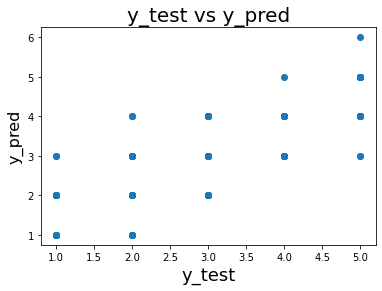

In [178]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_pred_final)
plt.title('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18) 
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [179]:
# Getting r2_Score:
r2_score(y_test, y_pred_final)

0.4214476787765009

In [180]:
# Concatenating
y_pred_final = pd.concat([y_test,y_pred_final],axis=1)
y_pred_final = pd.concat([X_test['Provider ID'],y_pred_final],axis=1)
y_pred_final

,Provider ID,Hospital overall rating,predicted_rating
2611,281320,3,3
492,50616,3,3
3996,450080,3,3
3174,360044,3,3
3908,440120,2,3
...,...,...,...
4043,450214,3,2
179,31317,3,3
3708,400114,2,2
1266,141322,4,4


In [181]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final['Hospital overall rating'], y_pred_final['predicted_rating'])

0.5954337899543379

We can observe that Overall Accuracy for the above model is found to be 59.5%

The Equation for best fitted line is:

Rating = 3.090873 - 0.357644 x PSI_90_SAFETY - 0.054019 x OP_10 + 0.050121 x OP_13 + 0.058894 x OP_8 -0.053359 x MORT_30_AMI - 0.119120 x MORT_30_COPD - 0.074737 x MORT_30_HF - 0.172764 x MORT_30_PN - 0.043535 x MORT_30_STK + 0.048406 x READM_30_CABG + 0.132755 x READM_30_COPD + 0.071689 x READM_30_HF + 0.030086 x READM_30_HIP_KNEE - 0.354792 x READM_30_HOSP_WIDE - 0.174265 x ED_1b + 0.118215 x IMM_2 + 0.065893 x IMM_3 + 0.054150 x STK_1 + 0.082043 x VTE_1 + 0.112600 x H_COMP_7 - 0.072443 x HAI_1

## Logistic Regression:

In [182]:
df_fin = df_final.fillna(0)

In [183]:
X_Scaled = df_fin.drop(['Hospital overall rating','Provider ID'],axis=1)
X_Scaled.head()

,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_HSP_RATING,H_QUIET_HSP,H_RECMND,COMP_HIP_KNEE,...,VTE_5,VTE_6,H_COMP_6,H_COMP_7,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
0,0,0,0,0,0,0,0,0,0,3.8,...,90.0,0.0,87.0,82.0,1.030,0.974,0.950,0.0,0.107,0.562
1,0,0,0,0,0,0,0,0,0,3.0,...,100.0,0.0,88.0,81.0,0.337,0.167,0.019,0.0,0.233,0.177
2,0,0,0,0,0,0,0,0,0,3.8,...,92.0,0.0,83.0,80.0,0.138,0.373,0.016,0.0,0.401,0.309
3,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,86.0,82.0,0.000,0.000,0.000,0.0,0.000,0.000
4,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.029


In [184]:
y = df_fin['Hospital overall rating']
y.head()

0    3
1    3
2    2
3    3
4    3
Name: Hospital overall rating, dtype: int32

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled,y, train_size=0.7,test_size=0.3,random_state=50)

## Feature Scaling

In [186]:
from sklearn.preprocessing import StandardScaler

In [187]:
X_train

,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_HSP_RATING,H_QUIET_HSP,H_RECMND,COMP_HIP_KNEE,...,VTE_5,VTE_6,H_COMP_6,H_COMP_7,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
1138,0,0,0,0,0,0,0,0,0,3.5,...,100.0,0.0,88.0,83.0,0.051,0.107,0.000,0.039,0.000,1.311
3254,0,0,0,0,0,0,0,0,0,3.5,...,100.0,0.0,90.0,83.0,0.011,0.243,0.015,0.000,0.000,0.750
2408,0,0,0,0,0,0,0,0,0,3.8,...,0.0,0.0,89.0,81.0,0.000,0.038,0.000,0.000,0.000,0.018
738,0,0,0,0,0,0,0,0,0,2.7,...,95.0,1.0,80.0,78.0,0.580,0.588,0.620,0.000,1.967,0.783
314,0,0,0,0,0,0,0,0,0,3.5,...,100.0,4.0,83.0,80.0,0.362,0.248,0.136,0.000,0.010,0.682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,0,0,0,0,0,0,0,0,0,3.4,...,98.0,0.0,86.0,80.0,0.571,0.640,0.469,0.333,0.660,0.795
2862,0,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,91.0,82.0,0.000,0.000,0.000,0.000,0.000,0.077
2573,0,0,0,0,0,0,0,0,0,2.9,...,96.0,0.0,87.0,79.0,0.425,0.495,0.000,0.000,0.819,0.256
1920,0,0,0,0,0,0,0,0,0,2.9,...,94.0,0.0,92.0,87.0,0.000,0.000,0.000,0.000,0.000,0.014


In [188]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.        ,  0.        ,  0.        , ..., -0.08204818,
        -0.46332619,  2.31192221],
       [ 0.        ,  0.        ,  0.        , ..., -0.2796509 ,
        -0.46332619,  0.857734  ],
       [ 0.        ,  0.        ,  0.        , ..., -0.2796509 ,
        -0.46332619, -1.03970945],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.2796509 ,
         1.83402964, -0.42278111],
       [ 0.        ,  0.        ,  0.        , ..., -0.2796509 ,
        -0.46332619, -1.05007799],
       [ 0.        ,  0.        ,  0.        , ...,  1.18463591,
         0.08646836,  0.54667769]])

In [189]:
logre = LogisticRegression(solver = 'newton-cg')
mod = logre.fit(X_train,y_train)
predict = mod.predict(X_train)
predict

array([2, 4, 3, ..., 3, 4, 3])

In [190]:
ytrain_prob= logre.predict_proba(X_train)
ytrain_prob

array([[1.16796388e-01, 8.33142853e-01, 5.00195034e-02, 4.11775131e-05,
        7.84172227e-08],
       [8.01912281e-08, 1.76562499e-03, 2.53013289e-01, 7.10416921e-01,
        3.48040849e-02],
       [4.16565099e-05, 6.41121164e-02, 8.74856084e-01, 6.09471753e-02,
        4.29679790e-05],
       ...,
       [3.22600117e-05, 5.54382389e-02, 8.48652024e-01, 9.30319552e-02,
        2.84552159e-03],
       [2.52453155e-13, 1.84924193e-06, 4.79219253e-02, 8.48943321e-01,
        1.03132904e-01],
       [1.02522447e-03, 4.02110327e-01, 5.34970441e-01, 6.05910027e-02,
        1.30300568e-03]])

In [191]:
print(metrics.accuracy_score(y_train, predict))

0.7211124167645907


In [192]:
confusion = metrics.confusion_matrix(y_train, predict )
print(confusion)

[[  64   24    1    0    0]
 [   7  306  151    2    0]
 [   0   80 1000  145    0]
 [   0    1  238  440   10]
 [   0    0    2   51   31]]


In [193]:
from sklearn.metrics import classification_report

In [194]:
print(classification_report(y_train, predict))

              precision    recall  f1-score   support

           1       0.90      0.72      0.80        89
           2       0.74      0.66      0.70       466
           3       0.72      0.82      0.76      1225
           4       0.69      0.64      0.66       689
           5       0.76      0.37      0.50        84

    accuracy                           0.72      2553
   macro avg       0.76      0.64      0.68      2553
weighted avg       0.72      0.72      0.72      2553



In [195]:
from sklearn.metrics import f1_score

In [196]:
f1_score(y_train,predict,average='weighted')

0.7172546882071128

### Test Data

In [197]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.        ,  0.        ,  0.        , ..., -0.2796509 ,
        -0.46332619,  0.12415955],
       [ 0.        ,  0.        ,  0.        , ..., -0.2796509 ,
         1.16361689,  0.50001925],
       [ 0.        ,  0.        ,  0.        , ...,  1.29103738,
         1.23374374,  1.49799155],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.2796509 ,
         1.46656491, -0.78827227],
       [ 0.        ,  0.        ,  0.        , ..., -0.2796509 ,
        -0.46332619, -0.24910801],
       [ 0.        ,  0.        ,  0.        , ..., -0.2796509 ,
        -0.46332619, -1.08636789]])

In [198]:
ytest_prob= logre.predict_proba(X_test)
ytest_prob

array([[1.71839604e-08, 6.49694951e-04, 1.48388043e-01, 6.12788870e-01,
        2.38173375e-01],
       [8.02842230e-08, 8.75306120e-04, 1.50895380e-01, 7.14930344e-01,
        1.33298889e-01],
       [7.29705318e-06, 1.72821951e-02, 2.61078664e-01, 7.06635341e-01,
        1.49965027e-02],
       ...,
       [3.83271273e-03, 5.35094694e-01, 4.58310531e-01, 2.75836864e-03,
        3.69362991e-06],
       [4.25933106e-10, 5.01717247e-03, 4.05302603e-01, 5.89679392e-01,
        8.31885543e-07],
       [3.54687431e-10, 3.98824369e-04, 2.79387313e-01, 7.13024609e-01,
        7.18925327e-03]])

In [199]:
predict_test = mod.predict(X_test)

In [200]:
predict_test[:10]

array([4, 4, 4, 3, 4, 3, 4, 3, 4, 2])

In [201]:
predict_test

array([4, 4, 4, ..., 2, 4, 4])

In [202]:
predict_test_1 = pd.DataFrame(predict_test)
predict_test_1.head()

,0
0,4
1,4
2,4
3,3
4,4


In [203]:
# Converting to dataframe
y_test_df = pd.DataFrame(y_test)

In [204]:
# Putting Provider ID to index
y_test_df['Provider ID'] = y_test_df.index

In [205]:
# Removing index for both dataframes to append them side by side 
predict_test_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [206]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, predict_test_1],axis=1)
y_pred_final.head()

,Hospital overall rating,Provider ID,0
0,4,1132,4
1,3,736,4
2,3,967,4
3,4,3018,3
4,3,4103,4


In [207]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Pred_Rating'})

In [208]:
y_pred_final.head()

,Hospital overall rating,Provider ID,Pred_Rating
0,4,1132,4
1,3,736,4
2,3,967,4
3,4,3018,3
4,3,4103,4


In [209]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final['Hospital overall rating'], y_pred_final['Pred_Rating'])

0.6986301369863014

In [210]:
confusion = metrics.confusion_matrix(y_pred_final['Hospital overall rating'], y_pred_final['Pred_Rating'])
print(confusion)

[[ 18  10   0   0   0]
 [  9 139  70   0   0]
 [  0  37 433  76   1]
 [  0   1 103 163   8]
 [  0   0   0  15  12]]


In [211]:
print(classification_report(y_test,predict_test))

              precision    recall  f1-score   support

           1       0.67      0.64      0.65        28
           2       0.74      0.64      0.69       218
           3       0.71      0.79      0.75       547
           4       0.64      0.59      0.62       275
           5       0.57      0.44      0.50        27

    accuracy                           0.70      1095
   macro avg       0.67      0.62      0.64      1095
weighted avg       0.70      0.70      0.70      1095



In [212]:
f1_score(y_test,predict_test,average='weighted')

0.6956899511838913

In [213]:
summary=pd.DataFrame(columns=('Models','Train f1 score','Test f1 scores','Train Accuracy','Test Accuracy'))


In [214]:
summary.loc[0]=['Logistic Regression',0.717,0.695,0.721,0.70]


In [215]:
summary

,Models,Train f1 score,Test f1 scores,Train Accuracy,Test Accuracy
0,Logistic Regression,0.717,0.695,0.721,0.7


### From Logistic Regresssion we can see that we got an accuracy of 69.86%.

## Random Forest

In [216]:
df_final.set_index('Provider ID',inplace = True)
df_final.head()

,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_HSP_RATING,H_QUIET_HSP,H_RECMND,Hospital overall rating,...,VTE_5,VTE_6,H_COMP_6,H_COMP_7,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
Provider ID,,,,,,,,,,,,,,,,,,,,,
10001,0,0,0,0,0,0,0,0,0,3,...,90.0,0.0,87.0,82.0,1.030,0.974,0.950,0.0,0.107,0.562
10005,0,0,0,0,0,0,0,0,0,3,...,100.0,0.0,88.0,81.0,0.337,0.167,0.019,0.0,0.233,0.177
10006,0,0,0,0,0,0,0,0,0,2,...,92.0,0.0,83.0,80.0,0.138,0.373,0.016,0.0,0.401,0.309
10007,0,0,0,0,0,0,0,0,0,3,...,0.0,0.0,86.0,82.0,0.000,0.000,0.000,0.0,0.000,0.000
10008,0,0,0,0,0,0,0,0,0,3,...,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.000,0.029


In [217]:
## Putting feature Variable to X

X = df_final.drop(['Hospital overall rating'],axis=1)

## Putting response variable to y
y = df_final['Hospital overall rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [218]:
standard_scaler = StandardScaler()
X_cv = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [219]:
xg = RandomForestClassifier(random_state=50)

xg.fit(X_cv,y_train)
ytrain_pred=xg.predict(X_cv)
#ytrain_pred = np.argmax(ytrain_pred, axis = 0)
ytrain_prob=xg.predict_proba(X_cv)
print('Train Results \n ')
print(ytrain_prob)
print(ytrain_pred)
print(f1_score(y_train,ytrain_pred,average='weighted'))
print(accuracy_score(y_train,ytrain_pred))
ytest_pred=xg.predict(X_test)
ytest_prob=xg.predict_proba(X_test)
print('\n')
print('Test Results ')
print(ytest_prob)
print(ytest_pred)
print(f1_score(y_test,ytest_pred,average='weighted'))
print(accuracy_score(y_test,ytest_pred))


Train Results 
 
[[0.   0.01 0.81 0.17 0.01]
 [0.   0.   0.94 0.06 0.  ]
 [0.01 0.   0.85 0.14 0.  ]
 ...
 [0.04 0.77 0.17 0.02 0.  ]
 [0.02 0.09 0.84 0.05 0.  ]
 [0.   0.01 0.91 0.07 0.01]]
[3 3 3 ... 2 3 3]
1.0
1.0


Test Results 
[[0.01 0.09 0.65 0.24 0.01]
 [0.07 0.52 0.39 0.02 0.  ]
 [0.   0.04 0.81 0.14 0.01]
 ...
 [0.01 0.18 0.44 0.36 0.01]
 [0.04 0.33 0.47 0.15 0.01]
 [0.   0.23 0.51 0.23 0.03]]
[3 2 3 2 3 3 2 4 3 3 3 4 3 4 3 3 3 3 3 3 4 3 4 4 4 2 3 3 2 4 3 4 3 3 3 3 4
 2 3 3 4 4 3 2 3 3 2 3 2 3 3 3 3 4 3 4 3 4 2 3 3 3 3 3 4 3 4 3 3 2 1 4 3 3
 3 3 4 4 2 3 2 5 3 3 2 3 3 3 3 3 4 3 3 3 3 4 3 2 2 4 2 2 4 4 3 3 3 3 2 3 3
 3 3 2 3 3 3 3 3 3 3 4 3 3 2 3 3 3 3 3 3 3 3 3 2 3 3 3 3 2 3 3 3 3 4 4 3 4
 3 3 3 3 3 4 3 3 3 2 3 2 3 3 4 4 3 4 4 3 5 3 3 4 4 3 4 3 4 3 3 3 2 3 3 3 4
 3 3 4 2 3 4 4 3 3 4 4 3 4 5 3 3 3 3 3 4 3 4 3 3 3 3 3 3 3 2 3 3 2 4 3 2 2
 3 3 4 3 4 3 2 3 3 3 3 3 3 3 3 3 3 4 3 3 3 3 3 2 5 3 3 3 2 3 3 4 2 3 3 4 5
 3 3 3 4 3 3 4 3 3 3 5 4 4 3 4 4 4 3 5 3 3 3 3 3 2 2 2 3 3 3 3 2 3 3

In [220]:
pd.Series(ytrain_pred)

0       3
1       3
2       3
3       3
4       2
       ..
2731    5
2732    2
2733    2
2734    3
2735    3
Length: 2736, dtype: int32

In [221]:
df_feature = pd.DataFrame(xg.feature_importances_*100,columns=['important'])
df_feature['Feature_names']=X_train.columns
dff=df_feature.sort_values(by='important',ascending=False)
dff = dff.iloc[:15].reset_index()
dff.drop('index',axis=1,inplace=True)
dff.sort_values(by='important',inplace=True)
dff

,important,Feature_names
14,1.933240,OP_18b
13,2.008921,IMM_3
12,2.176768,OP_10
11,2.461222,ED_2b
10,2.501513,READM_30_COPD
9,2.557275,MORT_30_COPD
8,2.938022,ED_1b
7,2.983450,MORT_30_HF
6,3.037818,READM_30_HF
5,3.598113,READM_30_PN


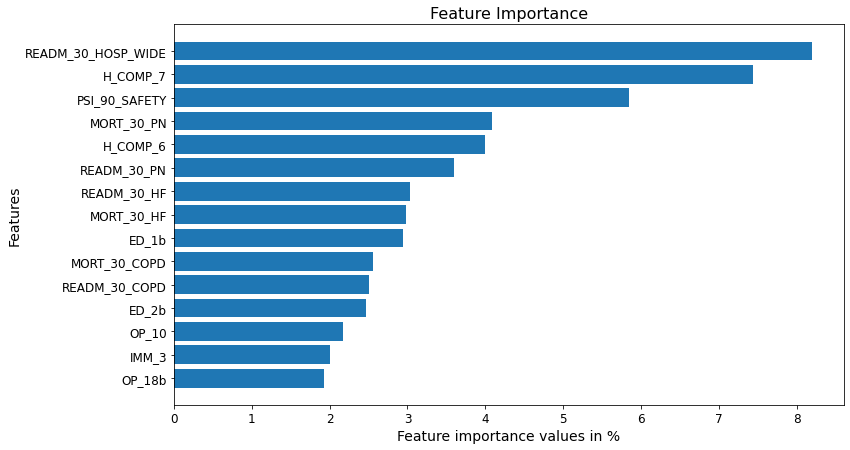

In [222]:
plt.figure(figsize=(12,7))
w=np.arange(15)
plt.barh(w,dff['important'])
plt.title("Feature Importance",fontsize=16)
plt.xlabel('Feature importance values in %',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.yticks(w,dff["Feature_names"])
plt.show()

In [223]:
list(dff['Feature_names'])

['OP_18b',
 'IMM_3',
 'OP_10',
 'ED_2b',
 'READM_30_COPD',
 'MORT_30_COPD',
 'ED_1b',
 'MORT_30_HF',
 'READM_30_HF',
 'READM_30_PN',
 'H_COMP_6',
 'MORT_30_PN',
 'PSI_90_SAFETY',
 'H_COMP_7',
 'READM_30_HOSP_WIDE']

In [224]:
top15 = X_train[['OP_20',
 'OP_18b',
 'OP_10',
 'ED_2b',
 'MORT_30_COPD',
 'READM_30_COPD',
 'MORT_30_HF',
 'ED_1b',
 'READM_30_HF',
 'READM_30_PN',
 'MORT_30_PN',
 'H_COMP_6',
 'PSI_90_SAFETY',
 'H_COMP_7',
 'READM_30_HOSP_WIDE']]
top15.head()

,OP_20,OP_18b,OP_10,ED_2b,MORT_30_COPD,READM_30_COPD,MORT_30_HF,ED_1b,READM_30_HF,READM_30_PN,MORT_30_PN,H_COMP_6,PSI_90_SAFETY,H_COMP_7,READM_30_HOSP_WIDE
Provider ID,,,,,,,,,,,,,,,
471303,0.0,0.0,0.0,61.0,10.8,20.6,15.7,256.0,20.7,15.5,17.2,92.0,0.00,83.0,14.6
171371,20.0,90.0,16.8,0.0,7.6,20.3,12.1,144.0,21.3,16.7,16.9,83.0,0.00,81.0,15.2
241354,0.0,0.0,2.3,42.0,0.0,0.0,12.8,209.0,22.2,16.8,14.1,85.0,0.00,82.0,16.1
360086,18.0,178.0,3.2,127.0,7.3,19.5,12.8,339.0,24.6,18.4,17.6,86.0,0.79,78.0,15.8
360141,31.0,195.0,7.1,179.0,7.2,20.5,12.2,400.0,21.7,17.4,14.7,86.0,1.04,77.0,15.2


In [225]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           1       1.00      0.17      0.29        29
           2       0.71      0.56      0.63       163
           3       0.72      0.92      0.81       457
           4       0.79      0.60      0.68       231
           5       0.69      0.34      0.46        32

    accuracy                           0.73       912
   macro avg       0.78      0.52      0.57       912
weighted avg       0.74      0.73      0.72       912



In [226]:
# Printing Confusion Matrix
print(confusion_matrix(y_test,ytest_pred))

[[  5  22   2   0   0]
 [  0  91  72   0   0]
 [  0  15 422  20   0]
 [  0   0  87 139   5]
 [  0   0   3  18  11]]


In [227]:
summary.loc[1] = ['Random Forest',1.0,0.70,1.0,0.72]
summary

,Models,Train f1 score,Test f1 scores,Train Accuracy,Test Accuracy
0,Logistic Regression,0.717,0.695,0.721,0.70
1,Random Forest,1.000,0.700,1.000,0.72


In [228]:
print(accuracy_score(y_test,ytest_pred))

0.7324561403508771


## Hyperparameter Tuning

In [229]:
n_folds =5

parameters = {'max_depth': range(2,20,5)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf, parameters, cv=n_folds, scoring='accuracy', return_train_score = True)

rf.fit(X_cv,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [230]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.449674,0.042794,0.030176,0.002133,2,{'max_depth': 2},0.496350,0.497258,0.504570,0.502742,...,0.497442,0.006396,4,0.502742,0.505254,0.503883,0.498401,0.494290,0.500914,0.004030
1,0.828995,0.042318,0.030649,0.005651,7,{'max_depth': 7},0.686131,0.683729,0.678245,0.663620,...,0.675069,0.009692,3,0.854662,0.855185,0.846962,0.855642,0.844221,0.851334,0.004778
2,1.093668,0.166492,0.033764,0.007056,12,{'max_depth': 12},0.697080,0.705667,0.722121,0.674589,...,0.703950,0.017375,2,0.994059,0.993604,0.995889,0.994518,0.995432,0.994700,0.000848
3,1.161477,0.127925,0.035221,0.012877,17,{'max_depth': 17},0.722628,0.698355,0.722121,0.665448,...,0.710888,0.027243,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


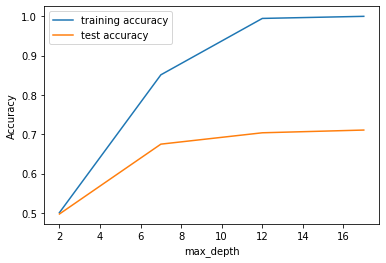

In [231]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning n_estimators

In [232]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [233]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.447577,0.122863,0.024399,0.003112,100,{'n_estimators': 100},0.609489,0.612431,0.614260,0.610603,...,0.602702,0.018060,3,0.638026,0.645043,0.633166,0.656464,0.640932,0.642726,0.007884
1,3.035633,0.246074,0.148600,0.007747,500,{'n_estimators': 500},0.600365,0.608775,0.617916,0.605119,...,0.601243,0.014768,4,0.644881,0.640475,0.646414,0.649612,0.646871,0.645651,0.003005
2,5.144361,0.132175,0.269711,0.013988,900,{'n_estimators': 900},0.600365,0.614260,0.614260,0.605119,...,0.604534,0.009578,1,0.641682,0.650982,0.640932,0.652810,0.650069,0.647295,0.004974
3,7.407163,0.112238,0.367990,0.005659,1300,{'n_estimators': 1300},0.600365,0.605119,0.621572,0.614260,...,0.604534,0.013711,2,0.644424,0.644130,0.649155,0.656464,0.653266,0.649488,0.004846


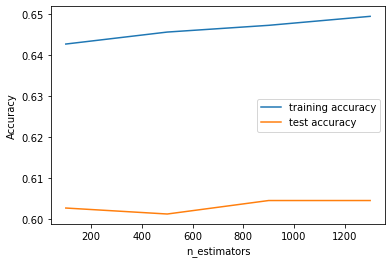

In [234]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning max_features

In [235]:
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [236]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.450741,0.012185,0.032387,0.004403,4,{'max_features': 4},0.551095,0.546618,0.553931,0.537477,...,0.547148,0.005580,5,0.578611,0.578803,0.581087,0.579717,0.599817,0.583607,0.008152
1,0.615306,0.009947,0.030005,0.001255,8,{'max_features': 8},0.624088,0.625229,0.628885,0.603291,...,0.612203,0.018636,4,0.660420,0.652353,0.657835,0.669712,0.650525,0.658169,0.006792
2,0.829253,0.009299,0.031205,0.005190,14,{'max_features': 14},0.658759,0.676417,0.658135,0.634369,...,0.655335,0.013739,3,0.697898,0.700777,0.694381,0.698036,0.697579,0.697734,0.002032
3,1.192864,0.108349,0.031502,0.003403,20,{'max_features': 20},0.671533,0.669104,0.659963,0.634369,...,0.656793,0.013730,2,0.700183,0.708543,0.700320,0.716309,0.702604,0.705592,0.006157
4,1.214797,0.008521,0.030085,0.003595,24,{'max_features': 24},0.689781,0.665448,0.674589,0.623400,...,0.660442,0.022756,1,0.704296,0.704431,0.701233,0.708086,0.703974,0.704404,0.002182


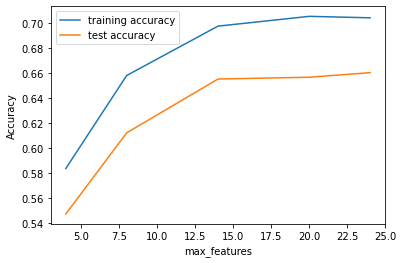

In [237]:
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_leaf

In [238]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [239]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.526380,0.007311,0.030312,0.000823,100,{'min_samples_leaf': 100},0.591241,0.603291,0.617916,0.608775,...,0.596859,0.018973,1,0.608775,0.614893,0.617634,0.623116,0.599817,0.612847,0.007986
1,0.483752,0.007966,0.030105,0.002875,150,{'min_samples_leaf': 150},0.558394,0.561243,0.574040,0.561243,...,0.561039,0.007642,2,0.568556,0.571494,0.571951,0.574692,0.579717,0.573282,0.003760
2,0.456200,0.008114,0.029068,0.003214,200,{'min_samples_leaf': 200},0.541971,0.524680,0.535649,0.537477,...,0.530332,0.010836,3,0.536563,0.530836,0.536775,0.551850,0.528552,0.536915,0.008125
3,0.418149,0.023450,0.029404,0.002013,250,{'min_samples_leaf': 250},0.516423,0.500914,0.489945,0.502742,...,0.504382,0.009213,4,0.515082,0.504340,0.492462,0.514847,0.516674,0.508681,0.009217
4,0.405103,0.010336,0.027007,0.002951,300,{'min_samples_leaf': 300},0.500000,0.486289,0.480804,0.484461,...,0.487934,0.006500,5,0.505941,0.483326,0.480585,0.483326,0.489265,0.488488,0.009176


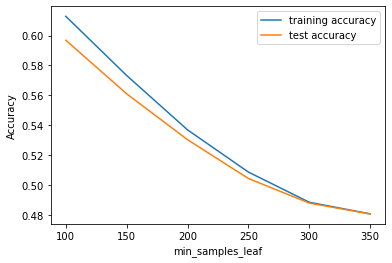

In [240]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Tuning min_samples_split

In [241]:
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(X_cv, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [242]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.584955,0.014567,0.032348,0.003367,200,{'min_samples_split': 200},0.596715,0.619744,0.636197,0.606947,...,0.611116,0.015215,1,0.638483,0.650525,0.636820,0.660119,0.650525,0.647295,0.008634
1,0.565857,0.012755,0.032859,0.004151,250,{'min_samples_split': 250},0.589416,0.595978,0.619744,0.592322,...,0.595031,0.013791,2,0.608775,0.635907,0.614893,0.624029,0.626770,0.622075,0.009441
2,0.528251,0.011520,0.029891,0.000712,300,{'min_samples_split': 300},0.593066,0.579525,0.594150,0.588665,...,0.585524,0.008418,3,0.597349,0.608040,0.610324,0.623572,0.608954,0.609648,0.008351
3,0.502492,0.041945,0.028405,0.002711,350,{'min_samples_split': 350},0.578467,0.563071,0.581353,0.564899,...,0.567247,0.011843,4,0.575868,0.580630,0.579717,0.590224,0.582915,0.581871,0.004755
4,0.479158,0.010501,0.028150,0.002519,400,{'min_samples_split': 400},0.565693,0.568556,0.577697,0.550274,...,0.560305,0.013720,5,0.564442,0.577433,0.575148,0.564641,0.568753,0.570084,0.005346


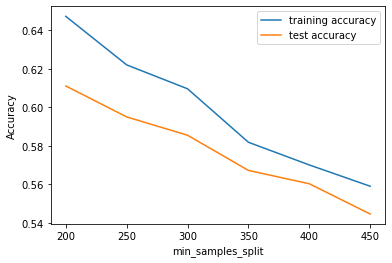

In [243]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Grid Search to Find Optimal Hyperparameters

In [244]:
param_grid = {
    'max_depth': [4,6,7],
    'min_samples_leaf': [125,150,175],
    'min_samples_split': [275,300,325],
    'n_estimators': [100,900,1000], 
    'max_features': [5,6,8]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [245]:
grid_search.fit(X_cv,y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 7], 'max_features': [5, 6, 8],
                         'min_samples_leaf': [125, 150, 175],
                         'min_samples_split': [275, 300, 325],
                         'n_estimators': [100, 900, 1000]},
             verbose=1)

In [246]:
print('Accuracy which can be get is',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy which can be get is 0.5716374269005847 using {'max_depth': 6, 'max_features': 8, 'min_samples_leaf': 125, 'min_samples_split': 275, 'n_estimators': 1000}


### Fitting the Final Model

In [247]:
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=6,
                             min_samples_leaf=125, 
                             min_samples_split=275,
                             max_features=8,
                             n_estimators=100)

In [248]:
# fit
rfc.fit(X_cv,y_train)

RandomForestClassifier(max_depth=6, max_features=8, min_samples_leaf=125,
                       min_samples_split=275)

In [249]:
# predict
y_test_pred = rfc.predict(X_test)

In [250]:
y_test_pred[:10]

array([3, 3, 3, 3, 3, 3, 3, 4, 3, 3])

In [251]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Hospital overall rating
Provider ID,
440009,3
450653,2
151310,3
330394,2
140148,2


In [252]:
y_test_df.value_counts()

Hospital overall rating
3                          457
4                          231
2                          163
5                           32
1                           29
dtype: int64

In [253]:
y_test_df['predicted_rating'] = y_test_pred
y_test_df.head()

,Hospital overall rating,predicted_rating
Provider ID,,
440009,3,3
450653,2,3
151310,3,3
330394,2,3
140148,2,3


In [254]:
y_pred_final = y_test_df

In [255]:
y_pred_final.head()

,Hospital overall rating,predicted_rating
Provider ID,,
440009,3,3
450653,2,3
151310,3,3
330394,2,3
140148,2,3


### Evaluation Matrix

In [256]:
metrics.accuracy_score(y_pred_final['Hospital overall rating'], y_pred_final['predicted_rating'])

0.6030701754385965

In [257]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           1       1.00      0.17      0.29        29
           2       0.71      0.56      0.63       163
           3       0.72      0.92      0.81       457
           4       0.79      0.60      0.68       231
           5       0.69      0.34      0.46        32

    accuracy                           0.73       912
   macro avg       0.78      0.52      0.57       912
weighted avg       0.74      0.73      0.72       912



In [258]:
print(confusion_matrix(y_test,ytest_pred))

[[  5  22   2   0   0]
 [  0  91  72   0   0]
 [  0  15 422  20   0]
 [  0   0  87 139   5]
 [  0   0   3  18  11]]


In [259]:
clf1 = RandomForestClassifier()
RF_score = cross_val_score(clf1, X_cv, y_train, cv=10, scoring='accuracy').mean()
RF_score

0.7152589502954466

### From above it can be seen that the overall accuracy is 72%.

## PCA and Clustering

In [260]:
df_pca = df_final

In [261]:

df_pca.columns

Index(['H_CLEAN_HSP', 'H_COMP_1', 'H_COMP_2', 'H_COMP_3', 'H_COMP_4',
       'H_COMP_5', 'H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND',
       'Hospital overall rating', 'COMP_HIP_KNEE', 'PSI_4_SURG_COMP',
       'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14', 'OP_8',
       'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF',
       'MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG',
       'READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE',
       'READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b',
       'ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23',
       'OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8',
       'VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_COMP_6', 'H_COMP_7',
       'HAI_1', 'HAI_2', 'HAI_3', 'HAI_4', 'HAI_5', 'HAI_6'],
      dtype='object')

In [262]:
numeric = ['COMP_HIP_KNEE','PSI_4_SURG_COMP', 'PSI_90_SAFETY', 'OP_10', 'OP_11', 'OP_13', 'OP_14','OP_8', 'MORT_30_AMI', 'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF','MORT_30_PN', 'MORT_30_STK', 'READM_30_AMI', 'READM_30_CABG','READM_30_COPD', 'READM_30_HF', 'READM_30_HIP_KNEE','READM_30_HOSP_WIDE', 'READM_30_PN', 'READM_30_STK', 'CAC_3', 'ED_1b','ED_2b', 'IMM_2', 'IMM_3', 'OP_18b', 'OP_20', 'OP_21', 'OP_22', 'OP_23','OP_3', 'OP_4', 'OP_5', 'PC_01', 'STK_1', 'STK_4', 'STK_6', 'STK_8','VTE_1', 'VTE_2', 'VTE_3', 'VTE_5', 'VTE_6', 'H_CLEAN_HSP', 'H_COMP_1','H_COMP_2', 'H_COMP_3', 'H_COMP_4', 'H_COMP_5', 'H_COMP_6', 'H_COMP_7','H_HSP_RATING', 'H_QUIET_HSP', 'H_RECMND', 'HAI_1', 'HAI_2', 'HAI_3','HAI_4', 'HAI_5', 'HAI_6']

In [263]:
scaler = StandardScaler()
df_pca[numeric] = scaler.fit_transform(df_pca[numeric])
df_pca

,H_CLEAN_HSP,H_COMP_1,H_COMP_2,H_COMP_3,H_COMP_4,H_COMP_5,H_HSP_RATING,H_QUIET_HSP,H_RECMND,Hospital overall rating,...,VTE_5,VTE_6,H_COMP_6,H_COMP_7,HAI_1,HAI_2,HAI_3,HAI_4,HAI_5,HAI_6
Provider ID,,,,,,,,,,,,,,,,,,,,,
10001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,...,0.740248,-0.230822,0.288208,0.307235,3.717869,3.429952,2.189166,-0.285226,-0.167453,0.365935
10005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,...,0.956224,-0.230822,0.331496,0.260942,0.825197,0.044476,-0.492519,-0.285226,0.186926,-0.616352
10006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,0.783443,-0.230822,0.115055,0.214649,-0.005455,0.908674,-0.501160,-0.285226,0.659431,-0.279568
10007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,...,-1.203530,-0.230822,0.244920,0.307235,-0.581484,-0.656112,-0.547247,-0.285226,-0.468393,-1.067949
10008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,...,-1.203530,-0.230822,-3.477863,-3.488766,-0.581484,-0.656112,-0.547247,-0.285226,-0.468393,-0.993959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
670096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,...,-1.203530,-0.230822,0.115055,0.214649,-0.581484,-0.656112,-0.547247,-0.285226,-0.468393,-1.037333
670098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,...,-1.203530,-0.230822,-3.477863,-3.488766,-0.581484,-0.563819,-0.547247,-0.285226,-0.468393,1.960557
480001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,0.675456,-0.230822,-0.187962,0.029479,0.879461,3.094341,-0.547247,-0.285226,0.437241,-0.603595


In [264]:
###### Improting the PCA module
pca = PCA(svd_solver='randomized', random_state=42)

In [265]:

# PCA on the data
pca.fit(df_pca)

PCA(random_state=42, svd_solver='randomized')

In [266]:
pca.components_

array([[ 9.99162600e-17,  0.00000000e+00,  0.00000000e+00, ...,
        -7.00960563e-02, -1.13296688e-01, -1.75179913e-01],
       [ 1.22080124e-18,  2.90566182e-17, -0.00000000e+00, ...,
         8.88706541e-02,  6.06141981e-02,  8.34486707e-02],
       [ 1.72585961e-20,  1.73472348e-18,  2.94902991e-17, ...,
         1.44346943e-01,  1.99253260e-01,  5.16087749e-02],
       ...,
       [ 0.00000000e+00,  3.00368140e-02,  6.98026362e-01, ...,
        -1.11022302e-16,  8.32667268e-17, -5.55111512e-17],
       [ 0.00000000e+00, -1.55590689e-01, -2.19255179e-02, ...,
         0.00000000e+00, -1.11022302e-16,  8.32667268e-17],
       [ 1.00000000e+00,  5.72870294e-07,  1.76970164e-07, ...,
         1.93329970e-16, -1.13183486e-15,  3.10491785e-16]])

In [267]:
pca.explained_variance_ratio_

array([2.82149960e-01, 8.45972642e-02, 5.86183161e-02, 5.23772941e-02,
       3.14701585e-02, 2.60831754e-02, 2.51591619e-02, 2.41864865e-02,
       2.12835466e-02, 1.94767969e-02, 1.89386046e-02, 1.80799138e-02,
       1.71127050e-02, 1.66705499e-02, 1.62994245e-02, 1.55086358e-02,
       1.53148917e-02, 1.45998772e-02, 1.42363572e-02, 1.39544075e-02,
       1.30789243e-02, 1.22853864e-02, 1.18849585e-02, 1.12260996e-02,
       1.10762531e-02, 1.08027386e-02, 1.06053435e-02, 1.02022684e-02,
       9.79756232e-03, 9.64983117e-03, 9.42832887e-03, 9.25464448e-03,
       8.91864919e-03, 8.23793026e-03, 7.13521355e-03, 6.99047693e-03,
       6.22450568e-03, 5.78171888e-03, 5.29196321e-03, 4.71666984e-03,
       4.21281032e-03, 3.97053330e-03, 3.22432904e-03, 3.03444076e-03,
       2.80859109e-03, 2.61361750e-03, 2.45434704e-03, 2.42566317e-03,
       1.63687499e-03, 1.37985602e-03, 1.33864431e-03, 1.19642420e-03,
       8.95556192e-04, 1.01318573e-04, 5.57201822e-32, 2.81690253e-33,
      

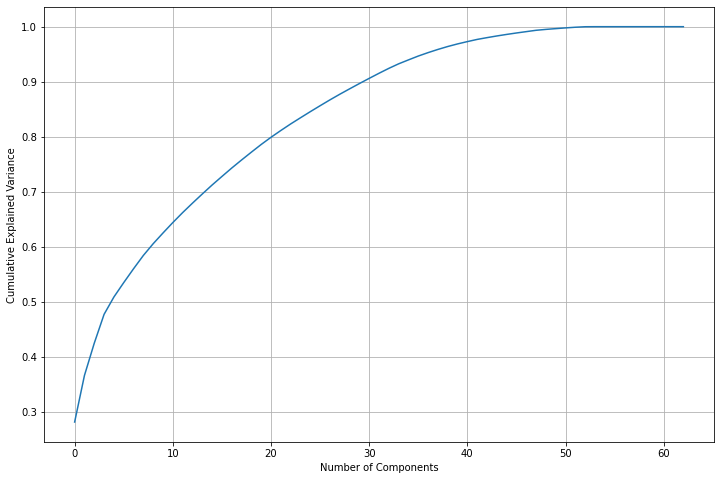

In [268]:
# Plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

If we take 30 components then the total variance will be around 91% as seen in the graph above.

In [269]:
colnames = list(df_pca.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

,PC1,PC2,Feature
0,9.991626e-17,1.220801e-18,H_CLEAN_HSP
1,0.000000e+00,2.905662e-17,H_COMP_1
2,0.000000e+00,-0.000000e+00,H_COMP_2
3,0.000000e+00,-0.000000e+00,H_COMP_3
4,0.000000e+00,-0.000000e+00,H_COMP_4
...,...,...,...
58,-1.338645e-01,1.033547e-01,HAI_2
59,-1.239043e-01,9.409902e-02,HAI_3
60,-7.009606e-02,8.887065e-02,HAI_4
61,-1.132967e-01,6.061420e-02,HAI_5


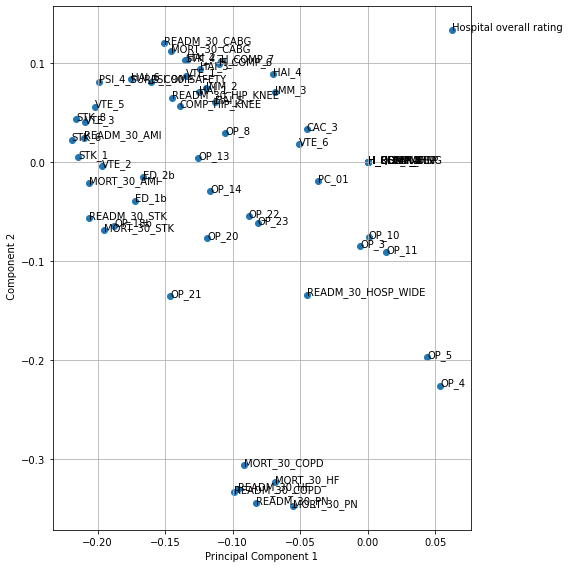

In [270]:
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('  Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.grid()
plt.show()

In [271]:

#Using Incremental PCA for efficiency
pca_final = IncrementalPCA(n_components=30)

In [272]:
df_train_pca = pca_final.fit_transform(df_pca)
df_pca = pd.DataFrame(df_train_pca)
df_pca.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30']
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,5.422136,-0.978690,-2.575524,-0.134388,2.282824,-0.569791,-1.756602,-0.025646,-0.287353,-0.702001,...,0.730108,-1.713778,0.259992,0.202155,-1.297106,-0.511133,1.018040,-1.548148,1.506550,-0.037947
1,2.541911,1.448775,2.198610,-0.481653,0.716016,-0.482605,0.838820,1.647598,0.211581,-0.813563,...,1.286645,0.318494,-0.698662,0.027349,-0.468963,0.442385,-0.696739,-0.611206,1.029274,-0.329050
2,3.163260,-0.375755,-0.626486,-2.192042,0.795875,-0.395582,1.586346,-0.429202,-0.305369,-0.037902,...,0.868174,0.958282,0.329732,-1.219513,-0.591735,-0.336783,-1.385113,-0.073341,0.781939,0.587261
3,-2.169104,2.779318,0.485748,1.656095,1.193652,0.687799,1.243955,-1.888907,0.687947,-0.412530,...,0.600661,-0.150990,0.772730,0.175487,-1.039049,0.974248,0.588618,1.076456,-0.039485,0.272610
4,-5.575080,1.260780,-3.146956,1.165567,-1.140744,-2.770827,0.943797,-0.911219,-0.857841,1.104860,...,0.583472,-0.609973,-0.541535,-0.184658,-1.003477,0.287463,0.356209,0.006801,-0.641254,0.200231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,-3.272797,-0.020032,-1.120938,-1.828706,-2.288723,1.109128,0.664506,-2.131036,-0.033323,-1.338013,...,0.164985,-0.227243,-0.309597,-0.619202,1.242736,-0.140803,-1.247255,-0.263675,0.258442,-0.619911
3644,-3.688872,-0.056725,-2.935277,0.990712,-3.002395,-2.167434,2.022187,-0.122480,-0.748946,0.302866,...,-0.980930,-0.374902,0.435102,0.487835,1.597522,0.089667,0.076712,-0.014445,0.198618,0.389863
3645,-0.398943,-0.428751,-1.492014,-1.043652,-3.033856,3.595975,1.958392,-0.357056,-1.340341,1.275518,...,0.755344,1.276820,0.526645,-0.252444,-2.394749,0.048025,0.091367,-1.020484,0.566385,0.818735
3646,-2.928315,0.921671,-2.426158,-2.773435,-2.070748,2.343466,0.638431,-1.483258,0.678987,-1.194439,...,2.720221,-1.351459,0.176581,-0.423120,-0.727132,-0.437418,0.455223,-0.954654,1.186263,0.675984


## Correlation Matrix

Reason of performing Correlation Matrix is because there should not be any correlation between the PCs

In [273]:
corrmat = np.corrcoef(df_train_pca.transpose())

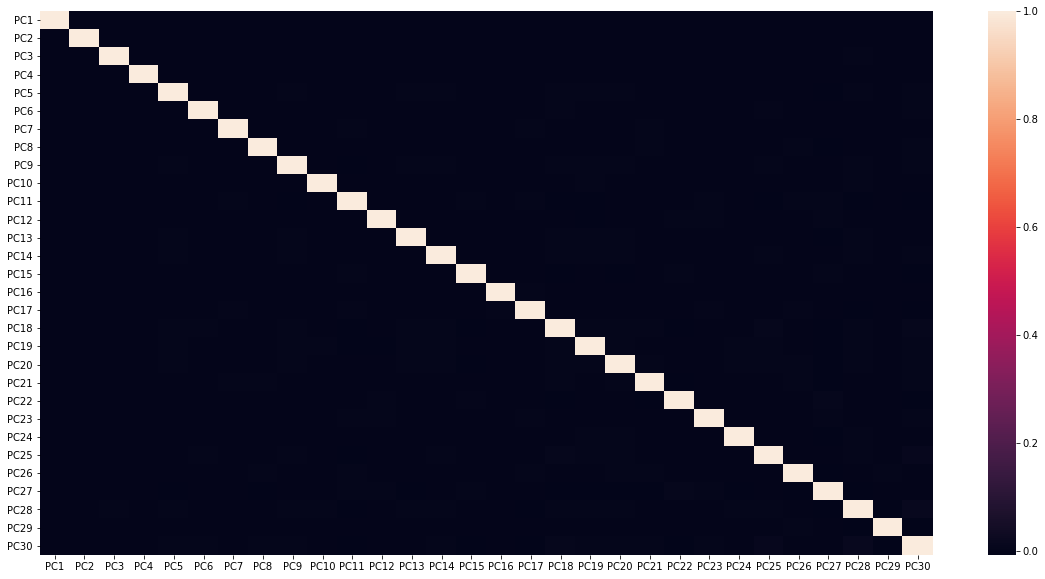

In [274]:
plt.figure(figsize = (20,10))
sns.heatmap(df_pca.corr())
plt.show()

We can observe from the above heat map that there are no correlation between the PCAs

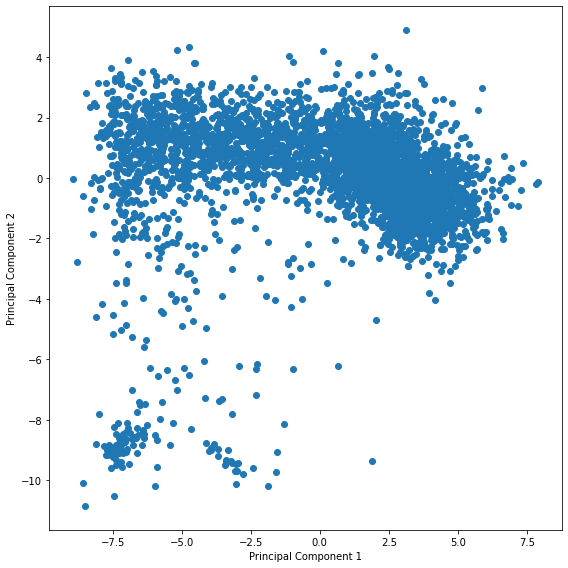

In [275]:
fig = plt.figure(figsize = (8,8))
plt.scatter(df_pca.PC1, df_pca.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

In [276]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print(corrmat_nodiag.max(), corrmat_nodiag.min(),)

0.013043972776199547 -0.0066618744275395506


The coorelation is almost 0

In [277]:

df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,5.422136,-0.978690,-2.575524,-0.134388,2.282824,-0.569791,-1.756602,-0.025646,-0.287353,-0.702001,...,0.730108,-1.713778,0.259992,0.202155,-1.297106,-0.511133,1.018040,-1.548148,1.506550,-0.037947
1,2.541911,1.448775,2.198610,-0.481653,0.716016,-0.482605,0.838820,1.647598,0.211581,-0.813563,...,1.286645,0.318494,-0.698662,0.027349,-0.468963,0.442385,-0.696739,-0.611206,1.029274,-0.329050
2,3.163260,-0.375755,-0.626486,-2.192042,0.795875,-0.395582,1.586346,-0.429202,-0.305369,-0.037902,...,0.868174,0.958282,0.329732,-1.219513,-0.591735,-0.336783,-1.385113,-0.073341,0.781939,0.587261
3,-2.169104,2.779318,0.485748,1.656095,1.193652,0.687799,1.243955,-1.888907,0.687947,-0.412530,...,0.600661,-0.150990,0.772730,0.175487,-1.039049,0.974248,0.588618,1.076456,-0.039485,0.272610
4,-5.575080,1.260780,-3.146956,1.165567,-1.140744,-2.770827,0.943797,-0.911219,-0.857841,1.104860,...,0.583472,-0.609973,-0.541535,-0.184658,-1.003477,0.287463,0.356209,0.006801,-0.641254,0.200231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,-3.272797,-0.020032,-1.120938,-1.828706,-2.288723,1.109128,0.664506,-2.131036,-0.033323,-1.338013,...,0.164985,-0.227243,-0.309597,-0.619202,1.242736,-0.140803,-1.247255,-0.263675,0.258442,-0.619911
3644,-3.688872,-0.056725,-2.935277,0.990712,-3.002395,-2.167434,2.022187,-0.122480,-0.748946,0.302866,...,-0.980930,-0.374902,0.435102,0.487835,1.597522,0.089667,0.076712,-0.014445,0.198618,0.389863
3645,-0.398943,-0.428751,-1.492014,-1.043652,-3.033856,3.595975,1.958392,-0.357056,-1.340341,1.275518,...,0.755344,1.276820,0.526645,-0.252444,-2.394749,0.048025,0.091367,-1.020484,0.566385,0.818735
3646,-2.928315,0.921671,-2.426158,-2.773435,-2.070748,2.343466,0.638431,-1.483258,0.678987,-1.194439,...,2.720221,-1.351459,0.176581,-0.423120,-0.727132,-0.437418,0.455223,-0.954654,1.186263,0.675984


### XG Boost

In [278]:
from sklearn.metrics import f1_score

In [279]:
from xgboost import XGBClassifier

y_test = y_test -1

y_train = y_train -1



In [280]:
xg = XGBClassifier(use_label_encoder=False)

xg.fit(X_cv,y_train)
ytrain_pred=xg.predict(X_cv)
#ytrain_pred = np.argmax(ytrain_pred, axis = 0)
ytrain_prob=xg.predict_proba(X_cv)
print('Train Results \n ')
print(ytrain_prob)
print(ytrain_pred)
print('Confusion Matrix \n')
print(confusion_matrix(y_train,ytrain_pred))
print('**************')
print('Accuracy SCore',accuracy_score(y_train,ytrain_pred))
print('F1 Score',f1_score(y_train, ytrain_pred,average='weighted'))
ytest_pred=xg.predict(X_test)
ytest_prob=xg.predict_proba(X_test)
print('\n')
print('Test Results ')
print('Confusion Matrix ')
print('*************************************')
print(confusion_matrix(y_test,ytest_pred),'\n')
print('Accuracy Score',accuracy_score(y_test,ytest_pred))
#print('ROC_AUC_SCORE',roc_auc_score(y_test,ytest_prob))
print('F1 Score',f1_score(y_test, ytest_pred,average='weighted'))

[15:29:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Results 
 
[[1.84900928e-04 2.73674564e-03 9.85938132e-01 1.02993045e-02
  8.40951048e-04]
 [5.52458050e-06 8.82084805e-06 9.97739434e-01 2.23945873e-03
  6.80740141e-06]
 [3.49106340e-05 6.61475409e-04 9.80475962e-01 1.84758063e-02
  3.51810508e-04]
 ...
 [6.56380027e-04 9.97281909e-01 2.01314921e-03 3.26769623e-05
  1.58460498e-05]
 [5.01865288e-04 5.33390325e-03 9.93909478e-01 1.81925105e-04
  7.27964507e-05]
 [3.60018385e-05 8.71981392e-05 9.98353124e-01 1.49781234e-03
  2.58633318e-05]]
[2 2 2 ... 1 2 2]
Confusion Matrix 

[[  88    0    0    0    0]
 [   0  521    0    0    0]
 [   0    0 1315    0    0]
 [   0    0    0  733    0]
 [   0    0    0    0   79]]
********

In [281]:
summary.loc[2]=['XGBoost Classifier',1.0,0.810,1.0,0.814]
summary


,Models,Train f1 score,Test f1 scores,Train Accuracy,Test Accuracy
0,Logistic Regression,0.717,0.695,0.721,0.700
1,Random Forest,1.000,0.700,1.000,0.720
2,XGBoost Classifier,1.000,0.810,1.000,0.814


### Measure values for Evanston Hospital.

In [282]:
df_evanston = df_final_1[df_final_1['Provider ID'] == 140010]

In [283]:
df_evanston_imp_measure = df_evanston[['READM_30_HOSP_WIDE','PSI_90_SAFETY','H_COMP_6','MORT_30_PN','READM_30_PN','READM_30_HF','MORT_30_HF','MORT_30_COPD','ED_2b','ED_1b']]

In [284]:
df_4 = df_final[df_final['Hospital overall rating'] == 4]

In [285]:
df_4_imp_measure = df_4[['READM_30_HOSP_WIDE','PSI_90_SAFETY','H_COMP_6','MORT_30_PN','READM_30_PN','READM_30_HF','MORT_30_HF','MORT_30_COPD','ED_2b','ED_1b']]
df_4_imp_measure.describe()

,READM_30_HOSP_WIDE,PSI_90_SAFETY,H_COMP_6,MORT_30_PN,READM_30_PN,READM_30_HF,MORT_30_HF,MORT_30_COPD,ED_2b,ED_1b
count,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000,964.000000
mean,-0.532928,-0.311833,0.233379,-0.228316,-0.202328,-0.146552,-0.115795,-0.155009,-0.246745,-0.254024
std,0.949561,0.956785,0.708392,0.980923,1.011096,1.017976,1.017996,1.064675,0.790084,0.843293
min,-15.794623,-2.013706,-3.477863,-4.260644,-4.802743,-3.914098,-3.529977,-3.211736,-1.377007,-2.067810
25%,-0.878701,-0.367138,0.288208,-0.456285,-0.276548,-0.076783,-0.186448,-0.263598,-0.690731,-0.496171
50%,-0.472826,0.046199,0.374784,-0.105529,-0.044436,0.093344,0.092180,0.078215,-0.340292,-0.185899
75%,-0.066951,0.317239,0.461361,0.272209,0.187677,0.244568,0.401766,0.377301,0.126960,0.213601
max,1.759489,1.618231,0.807666,1.810141,1.522324,1.265332,2.011613,1.744554,6.902111,4.356644


In [286]:
df_evanston_imp_measure

,READM_30_HOSP_WIDE,PSI_90_SAFETY,H_COMP_6,MORT_30_PN,READM_30_PN,READM_30_HF,MORT_30_HF,MORT_30_COPD,ED_2b,ED_1b
1124,15.2,1.45,84.0,13.0,16.6,21.2,9.5,5.7,76.0,245.0


From the above values for important feature we can see that if Evanston Hospital improve on few measures, it can improve it's rating from 3 to 4 atleast if:-

1. READM_30_HOSP_WIDE from 15.2 to 15.04.
2. PSI_90_SAFETY from 1.45 to 0.62.
3. H_COMP_6 from 84 to 85.73.
4. MORT_30_PN from 13 to 14.95.
5. READM_30_PN from 16.6 to 15.85.
6. READM_30_HF from 21.2 to 19.93.
7. MORT_30_HF from 9.5 to 11.02.
8. MORT_30_COPD from 5.7 to 7.15.
9. ED_2b from 76 to 77.4.
10. ED_1b from 245 to 223.6.

### Areas where Evanston Hospital needs improvement are-

- Safety
- Readmission
- Mortality
- Timeliness of Care